# Predicting Red Wine Quality based on their Physicochemical 

## Background problem :

&nbsp;&nbsp; One of the most consumed alcoholic drinks worldwide is wine. The United States, Italy, France, and Spain produce the most wine collectively, making up 47% of the world's total in 2021 (Ohana-Levi and Netzer, 2021). Due to the natural chemistry of the grapes, wine is formed from fermented grapes with or without the addition of acids, sugars, enzymes, water, or other nutrients. After grapes are collected, de-stemmed, and crushed, red wine is produced. The entire grape, including the skins, pulps, and seeds, are then fermented in the bottle to turn the sugar into alcohol. Yeast helps this process along with the conversion of malic acid to lactic acid and secondary fermentation, which produces flavors and increases acidity while maintaining stability (Zhang and Rosentrater, 2019).


&nbsp;&nbsp;  The wine industry requires wine certification and quality evaluation, which includes physicochemical and sensory tests, to guarantee the quality of wine production. Density, alcohol, pH, and other physical and chemical testing conducted in laboratories are examples of physicochemical tests; in contrast, sensory tests must be conducted using human senses (Cortez et al., 2009). However, it must select a different method of evaluating the quality because physicochemical and sensory tests, which are extremely time- and money-consuming, present a significant challenge in classifying wine quality (Koranga et al., 2021).


&nbsp;&nbsp;  Machine learning is a branch of Artificial Intelligence (AI) that can help classify wine quality parameters more quickly and cheaply (Koranga et al., 2021). It can also reveal patterns and trends that improve our understanding of the correlation between physicochemical and sensory tests (Cortez et al., 2009). In order to build machine learning to forecast the quality based on the physicochemical results and to conduct a thorough study of the relationship between the data, the Portuguese "Vinho Verde" red wine dataset was utilized in this project.

## Import Libraries

In [1]:
%%capture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import matplotlib.patches as patches
import seaborn as sns
import scipy.stats as st
from statsmodels.stats.outliers_influence import variance_inflation_factor
!pip install scikit_posthocs
import scikit_posthocs as sp
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from imblearn import under_sampling, over_sampling
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
!pip install shap
import shap
import pickle

## Load dataset

In [2]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Goals
1. Do Exploratory Data Analysis (EDA) to understand Red Wine Quality data
2. To predict the quality of Red Wine using Machine Learning Algorithm <br>

Features (input variable) andt target (output variable) make up the columns. The following is a description of every column: <br>
- Input variables (Physicochemical test) : <br>
a. `Fixed Acidity` <br>
b. `Volatile Acidity` <br>
c. `Citric Acid` <br>
d. `Residual Sugar` <br>
e. `Chlorides` <br>
f. `Free Sulfur Dioxide`  <br>
g. `Total Sulfur Dioxide` <br>
g. `Density`  <br>
h. `pH`  <br>
i. `Sulphates` <br>
j. `Alcohol`  <br>
- Output variable (Sensory test): <br>
k. `Quality`



## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are total 1599 observations and 10 columns. Every data type is numerical, and there are no missing values.

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1. **fixed acidity** has an average of *8.31* and ranges from *4.60* to *15.9*. <br>
2. **volatile acidity** ranges from *0.12* to *1.58* with an average of *0.52*. <br>
3. **citric acid** ranges from *0* to *1.00* with an average of *0.27*. <br>
4. **residual sugar** ranges from *0.90* to *15.50* with an average of *2.53*. <br>
5. **chlorides** ranges from *0.01* to *0.61* with an average of *0.09*. <br>
6. **free sulfur dioxide** ranges from *1.00* to *72.00* with an average of *15.87*. <br>
7. **total sulfur dioxide** ranges from *6.00* to *289.00* with an average of *46.47*. <br>
8. **density** ranges from *0.99* to *1.00* with an average of *1.00*. <br>
9. **pH** ranges from *2.74* to *4.01* with an average of *3.31*, <br>
10. **sulphates** ranges from *0.33* to *2.00* with an average of *0.66* <br>
11. **alcohol** ranges from *8.40* to *14.9* with an average of *10.42*. <br>
12. **quality (target)** has an average of *5.64* and ranges from *3* to *8*. <br>

Text(0.5, 0.98, 'Boxplot Distribution of All Collumns')

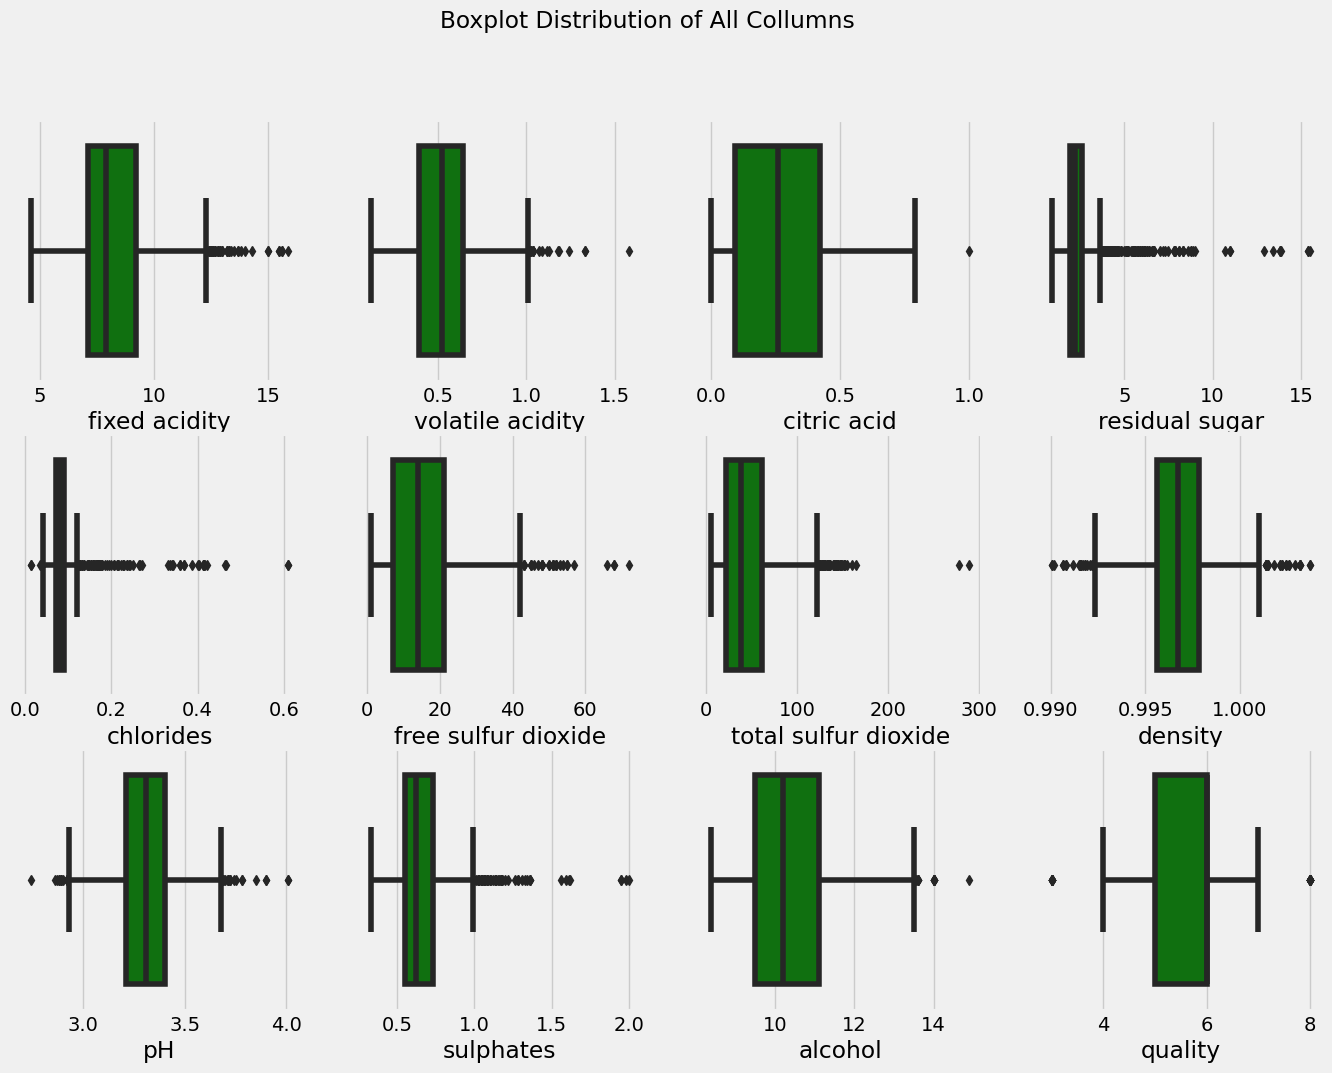

In [5]:
#Boxplot distribution
features = df.columns.tolist()
plt.figure(figsize=(15,11))
for i in range(0, len(features)):
  plt.subplot(3, 4, i+1)
  sns.boxplot(x=df[features[i]], color='green', orient='h')
plt.suptitle('Boxplot Distribution of All Collumns')

As there are outliers in each of the 11 inputs, cleaning is required during the preprocessing phase. However for target, it doesn't require to be manipulated.

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

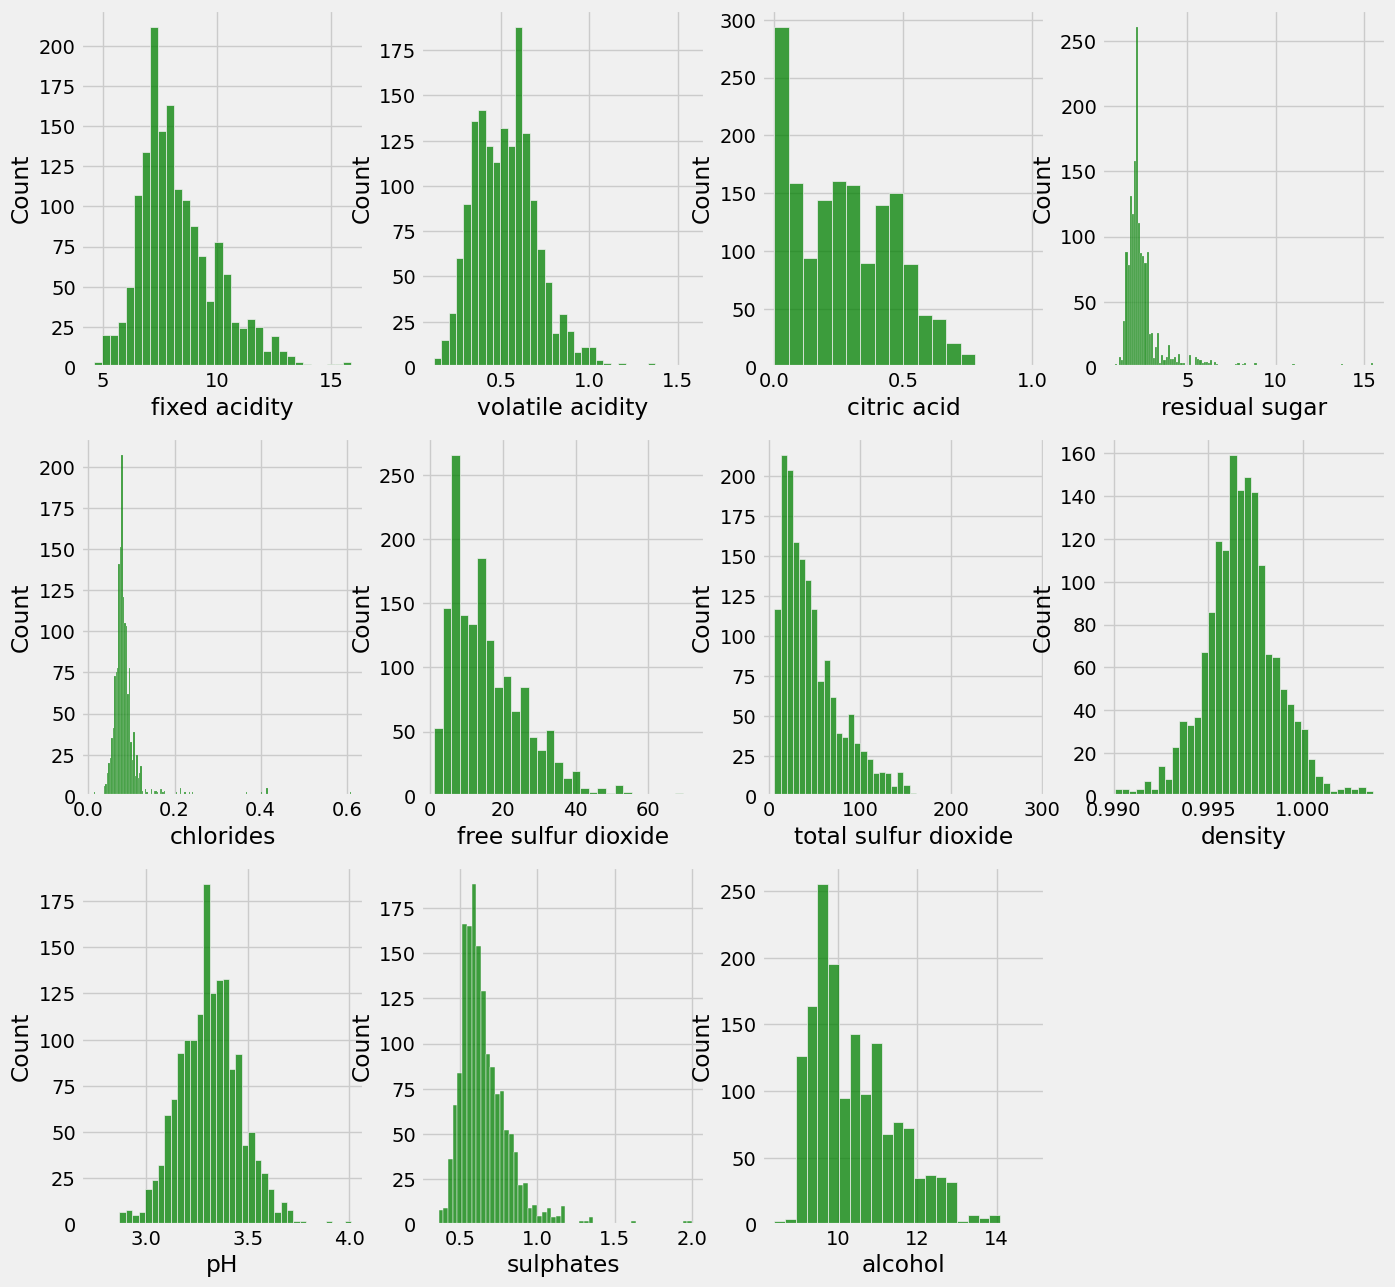

In [6]:
#Histogram plot distribution
no_target = ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol']
plt.figure(figsize=(15,15))
for i in range(0, len(no_target)):
  plt.subplot(3, 4, i+1)
  ax = sns.histplot(x=df[no_target[i]], color='green')

&ensp;&nbsp;  Several features, including **fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulfates, and alcohol**, show right skewed (mean > median) values according to the histogram plot. To demonstrate whether or not features are normally distributed, more statistical analysis is necessary. <br>


### Normality Test (D'Agostino Pearson)
&ensp;&nbsp;  The sample sizes in this project are greater than 50, and the significance level of 0.05 makes the **D'Agostino-Pearson test** appropriate for determining the normality of our data. This test can calculate kurtosis, skewness, and the distribution's asymmetry only by single p-value (Avram and Măruşteri, 2022).

In [7]:
#D'Agostino-Pearson Normality Test
for i in range(len(no_target)):
  norm = st.normaltest(np.array(df[no_target[i]]))
  if norm.pvalue > 0.05:
    print('p-Value of', no_target[i], 'is :', norm.pvalue, 'can be categorize as Normal')
  else:
    print('p-Value of', no_target[i], 'is :', norm.pvalue, 'can be categorize as Not Normal')

p-Value of fixed acidity is : 1.7528277735470436e-49 can be categorize as Not Normal
p-Value of volatile acidity is : 7.192589039756692e-32 can be categorize as Not Normal
p-Value of citric acid is : 9.662822259281018e-34 can be categorize as Not Normal
p-Value of residual sugar is : 0.0 can be categorize as Not Normal
p-Value of chlorides is : 0.0 can be categorize as Not Normal
p-Value of free sulfur dioxide is : 4.779365332171477e-75 can be categorize as Not Normal
p-Value of total sulfur dioxide is : 1.433890834343538e-106 can be categorize as Not Normal
p-Value of density is : 2.1473202738102222e-07 can be categorize as Not Normal
p-Value of pH is : 4.8468645347727716e-08 can be categorize as Not Normal
p-Value of sulphates is : 1.1759065222978855e-197 can be categorize as Not Normal
p-Value of alcohol is : 3.3163288473185496e-34 can be categorize as Not Normal


&nbsp;&nbsp;  The p-values for each features are less than 0.05, indicating that the data are **Not Normal**. The features must be standardized and the outliers must be dealt with (either by modification or by removal) in order to construct machine learning. At the **Data Preprocessing** step, these procedures can be carried out and explained.

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


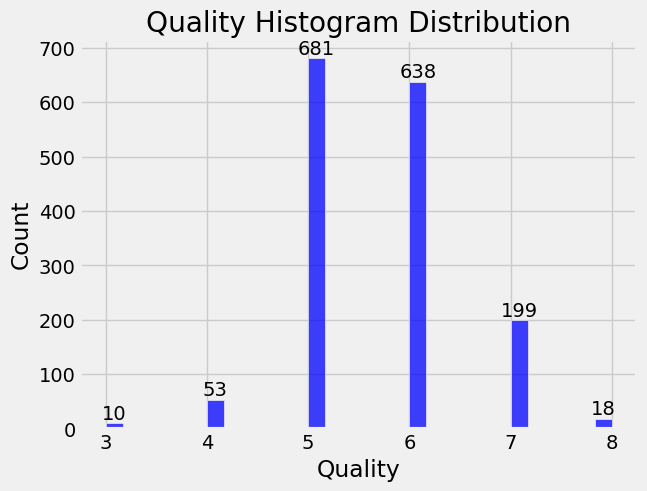

In [8]:
ax = sns.histplot(x=df['quality'], color='blue')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('Quality')
plt.title('Quality Histogram Distribution')
plt.show()

The most frequent number in red wine quality are **5** and **6**, with the count numbers of roughly **681** and **638**, respectively

## Effect of every physicochemical on Red Wine quality
In order to determine how the physicochemical factor might impact the red wine's quality, this section will conduct a thorough analysis of the data.

### Fixed Acidity

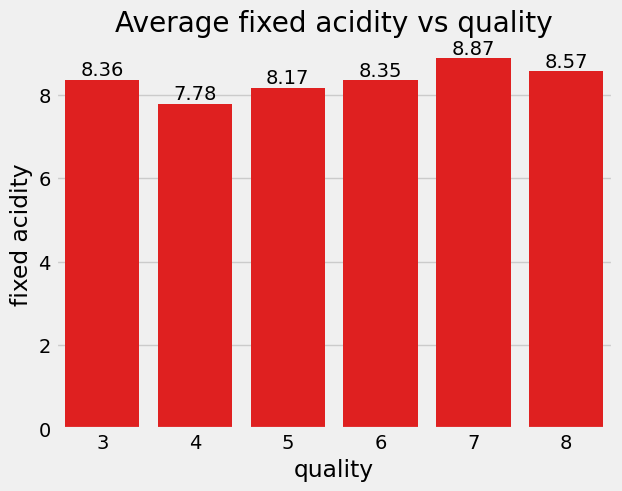

In [9]:
ax = sns.barplot(x=df['quality'], y=df['fixed acidity'], estimator='mean', color='red', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average fixed acidity vs quality')
plt.show()

&nbsp;&nbsp; According to the graph above, there is a slight difference of average fixed acidity value between quality with the highest value is *8.87* for quality of *7* and the lowest is *4* for quality of *4*. <br>


#### Statistical Analysis of Fixed Acidity and Quality
&nbsp;&nbsp;  In plain sight, the visualization does not reavel any disparities. To make that clear, statistical analysis of variance can be used to determine the differences in fixed acidity between the quality groups.
Previously, our data displays non-normal distribution. Therefore statistical non-parametric can be done to analyze the variance. **Kruskal-Wallis** test is an alternate version of ANOVA test for non-parametric data that can be utilized to checks the difference between all quality groups



In [10]:
#Kruskall Wallis
quality_3 = df[df['quality'] == 3]['fixed acidity']
quality_4 = df[df['quality'] == 4]['fixed acidity']
quality_5 = df[df['quality'] == 5]['fixed acidity']
quality_6 = df[df['quality'] == 6]['fixed acidity']
quality_7 = df[df['quality'] == 7]['fixed acidity']
quality_8 = df[df['quality'] == 8]['fixed acidity']
kw_fixacid = st.kruskal(quality_3, quality_4, quality_5, quality_6, quality_7, quality_8)
print('pvalue :', kw_fixacid.pvalue)
if kw_fixacid.pvalue > 0.05:
  print('Fail to reject H0, statistically, fixed acidity mean between quality group do not have a significant differences')
else:
  print('H1 accepted, statistically, fixed acidity mean between quality group have a significant differences')

pvalue : 1.1528814177914685e-05
H1 accepted, statistically, fixed acidity mean between quality group have a significant differences


#### Post-Hoc Analysis (Dunn's Test) Fixed Acidity-Quality
&nbsp;&nbsp;  When a significant difference between groups is found by the Kruskal-Wallis test, the following stage in statistical analysis is called **post-hoc analysis**. The purpose of this test is to determine which pair of groups varies significantly from the other using non-parametric post-hoc analysis, such as **Dunn's test**. After a Kruskal-Wallis test, Dunn's test is a suitable technique for pairwise comparisons (Dinno, 2015).



In [11]:
#Dunn's Test Fixed Acidity
dunn_fixacid = sp.posthoc_dunn(a = [quality_3, quality_4, quality_5, quality_6,quality_7,quality_8])
duns = pd.DataFrame(data=dunn_fixacid < 0.05) #show true for below p-Value/significantly difference
duns_fixacid = duns.rename(columns = {1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'}, index={1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'})
duns_fixacid.style.set_caption("Dunn's test Comparation of Fixed Acidity-Quality Groups ")

,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8
Q_3,False,False,False,False,False,False
Q_4,False,False,False,True,True,False
Q_5,False,False,False,False,True,False
Q_6,False,True,False,False,True,False
Q_7,False,True,True,True,False,False
Q_8,False,False,False,False,False,False


&nbsp;&nbsp;  The substantial difference in fixed acidity value between quality **4 with 6**, **4 with 7**, **5 with 7**, and **6 with 7** can be summed up by looking at the Dunn's test pvalue below 0.05.
For the wine product's pH, color, and shelf life, acidity is essential. The amount of organic acids, such as citric, tartaric, and malic acid, determines the fixed acidity. These acids support the sour and tart tests; if these acids are in the right proportions, sugar and phenolic compounds may contribute sweetness (Zoecklien et al., 1999). Up until quality number **7**, it appears that the panelists prefer the high fixed acidity; they do not appear to differ much from quality number **8**.

### Volatile acidity

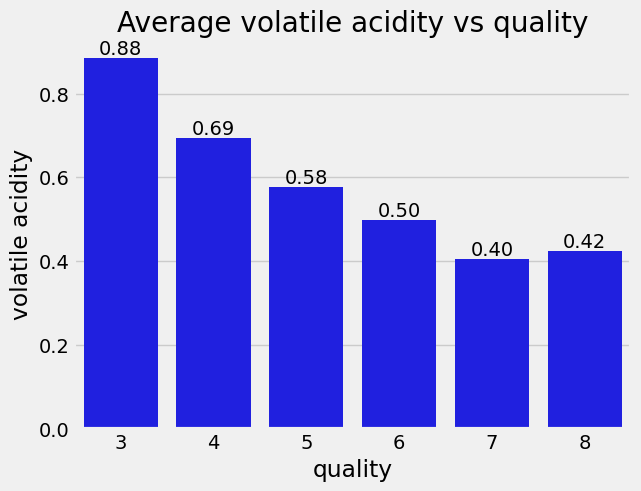

In [12]:
ax = sns.barplot(x=df['quality'], y=df['volatile acidity'], estimator='mean', color='blue', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average volatile acidity vs quality')
plt.show()

&nbsp;&nbsp;  Based on the graph above, volatile acidity tends to decrease as quality rises. The quality of **3** has the highest mean volatile acidity, **0.88**, while the quality of **7** has the lowest mean, **0.40**. <br>




#### Statistical Analysis of Volatile Acid and Quality

In [13]:
#Kruskall Wallis
quality_3 = df[df['quality'] == 3]['volatile acidity']
quality_4 = df[df['quality'] == 4]['volatile acidity']
quality_5 = df[df['quality'] == 5]['volatile acidity']
quality_6 = df[df['quality'] == 6]['volatile acidity']
quality_7 = df[df['quality'] == 7]['volatile acidity']
quality_8 = df[df['quality'] == 8]['volatile acidity']
kw_volacid = st.kruskal(quality_3, quality_4, quality_5, quality_6, quality_7, quality_8)
print('pvalue :', kw_volacid.pvalue)
if kw_volacid.pvalue > 0.05:
  print('Fail to reject H0, statistically, volatile acidity mean between quality group do not have a significant differences')
else:
  print('H1 accepted, statistically, volatile acidity mean between quality group have a significant differences')

pvalue : 2.2298939975568596e-50
H1 accepted, statistically, volatile acidity mean between quality group have a significant differences


#### Post-Hoc Analysis (Dunn's Test) Volatile Acidity-Quality

In [14]:
#Dunn's Test Volatile Acidity
dunn_volacid = sp.posthoc_dunn(a = [quality_3, quality_4, quality_5, quality_6,quality_7,quality_8])
duns = pd.DataFrame(data=dunn_volacid < 0.05) #show true for below p-Value/significantly difference
duns_volacid = duns.rename(columns = {1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'}, index={1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'})
duns_volacid.style.set_caption("Dunn's test Comparation of Volatile Acidity-Quality Groups ")

,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8
Q_3,False,False,True,True,True,True
Q_4,False,False,True,True,True,True
Q_5,True,True,False,True,True,True
Q_6,True,True,True,False,True,True
Q_7,True,True,True,True,False,False
Q_8,True,True,True,True,False,False


&nbsp;&nbsp;  Almost all of the categories differ significantly from one another according to Dunn's comparison, with the exception of **3 with 4** and **7 with 8** quality. The volatile acid value in wine serves as a marker for the presence of sulfurous, butyric, propionic, and acetic acids, which can be created by mold or spoiling bacteria and indicate whether the wine is safe to drink or spoiled. Improper storage conditions, such as inadequate vacuuming, elevated relative humidity, and elevated fermentation temperatures, can lead to elevated volatile acid levels. For that reason, the panelists noticed the condition of high volatile acid by taste, characterizing it as "finger nail polish remover" (Zoecklein et al., 1999).

### Citric Acid



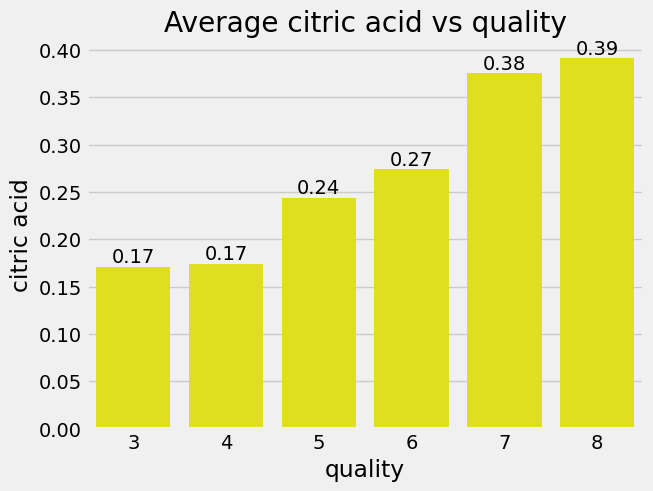

In [15]:
ax = sns.barplot(x=df['quality'], y=df['citric acid'], estimator='mean', color='yellow', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average citric acid vs quality')
plt.show()

&nbsp;&nbsp;  Based on the graph, panelists tend to like the the high content of citric acid in wine with the high citric acid contents (*0.39*) at the high quality of *8*. The trend shows a rise in quality as citric acid increase.

#### Statistical Analysis of Citric Acid and Quality

In [16]:
#Kruskall Wallis
quality_3 = df[df['quality'] == 3]['citric acid']
quality_4 = df[df['quality'] == 4]['citric acid']
quality_5 = df[df['quality'] == 5]['citric acid']
quality_6 = df[df['quality'] == 6]['citric acid']
quality_7 = df[df['quality'] == 7]['citric acid']
quality_8 = df[df['quality'] == 8]['citric acid']
kw_citacid = st.kruskal(quality_3, quality_4, quality_5, quality_6, quality_7, quality_8)
print('pvalue :', kw_citacid.pvalue)
if kw_citacid.pvalue > 0.05:
  print('Fail to reject H0, statistically, citric acid mean between quality group do not have a significant differences')
else:
  print('H1 accepted, statistically, citric acid mean between quality group have a significant differences')

pvalue : 1.1374798403913489e-18
H1 accepted, statistically, citric acid mean between quality group have a significant differences


#### Post-Hoc Analysis (Dunn's Test) Citric Acid-Quality

In [17]:
#Dunn's Test Citric Acid
dunn_citacid = sp.posthoc_dunn(a = [quality_3, quality_4, quality_5, quality_6,quality_7,quality_8])
duns = pd.DataFrame(data=dunn_citacid < 0.05) #if it show true, it means there are significantly difference between those groups
duns_citacid = duns.rename(columns = {1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'}, index={1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'})
duns_citacid.style.set_caption("Dunn's test Comparation of Citric Acid-Quality Groups ")

,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8
Q_3,False,False,False,False,True,True
Q_4,False,False,True,True,True,True
Q_5,False,True,False,True,True,True
Q_6,False,True,True,False,True,True
Q_7,True,True,True,True,False,False
Q_8,True,True,True,True,False,False


&nbsp;&nbsp;  Almost all groups have significant differences from one another when compared using Dunn's test, with the exception of **3 with 4, 3 with 5**, and **3 with 6**. One of the fixed acid groups that affects taste and color is citric acid. With a limit of 1 g/L, citric acid is typically added to wine after fermentation. This addition might improve color, keep the pH low, and result in a better-tasting product. Red wine often has scents of flowers, citrus, trees, and tropical fruit. (Zoecklien & Associates, 1999). Consequently, the panelists' preferences increased with red wine's citric acid level.

### Residual Sugar vs Quality

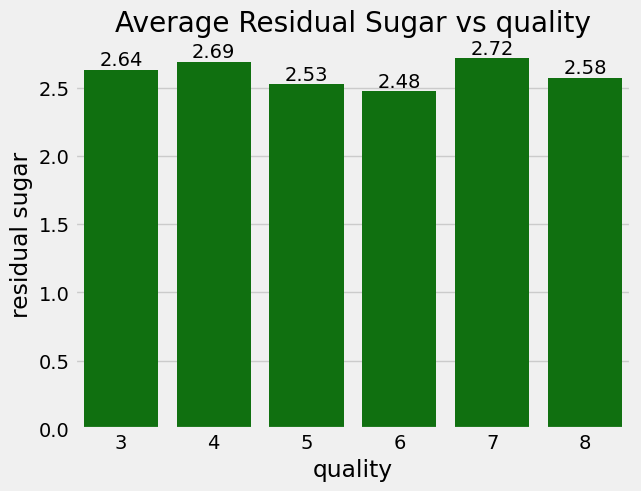

In [18]:
ax = sns.barplot(x=df['quality'], y=df['residual sugar'], estimator='mean', color='green', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average Residual Sugar vs quality')
plt.show()

&nbsp;&nbsp;  By visual, it seems that the trend of average residual sugar being fluctuative as the quality increases, with the highest residual sugar *(2.72)* at the quality of *7*. Proceed to the statistical analysis to see the difference between group

#### Statistical Analysis of Residual Sugar and Quality

In [19]:
#Kruskall Wallis
quality_3 = df[df['quality'] == 3]['residual sugar']
quality_4 = df[df['quality'] == 4]['residual sugar']
quality_5 = df[df['quality'] == 5]['residual sugar']
quality_6 = df[df['quality'] == 6]['residual sugar']
quality_7 = df[df['quality'] == 7]['residual sugar']
quality_8 = df[df['quality'] == 8]['residual sugar']
kw_ressugar = st.kruskal(quality_3, quality_4, quality_5, quality_6, quality_7, quality_8)
print('pvalue :', kw_ressugar.pvalue)
if kw_ressugar.pvalue > 0.05:
  print('Fail to reject H0, residual sugar mean between quality do not have a significant differences')
else:
  print('H1 accepted, residual sugar mean between quality have a significant differences')

pvalue : 0.23388810145429345
Fail to reject H0, residual sugar mean between quality do not have a significant differences


&nbsp;&nbsp;  Statistically, the panelists' preferences are unaffected by the average residual sugar based on the Kruskal-Wallis results (p-value > 0.05). Theoretically, during fermentation, the majority of added or endogenous sugar in grapes is converted to alcohol, leaving behind some residual sugar that may have an impact on the product's sweetness, fruity flavor, and aroma (McMahon et al., 2017). Because diverse customer preferences, such as gender, area, and experience, could result in different outcomes, it is getting more difficult to discern the quality based on the amount of sugar (Ailer et al., 2020).

### Chlorides vs Quality

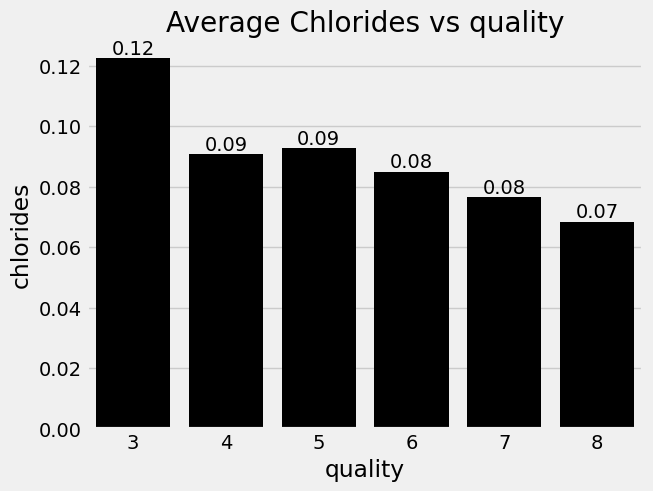

In [20]:
ax = sns.barplot(x=df['quality'], y=df['chlorides'], estimator='mean', color='black', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average Chlorides vs quality')
plt.show()

Based on the graph, average chlorides tend to plummet as the quality increases, with the highest mean **(0.12)** at the quality of **3**.

#### Statistical Analysis of Chlorides and Quality

In [21]:
#Kruskall Wallis
quality_3 = df[df['quality'] == 3]['chlorides']
quality_4 = df[df['quality'] == 4]['chlorides']
quality_5 = df[df['quality'] == 5]['chlorides']
quality_6 = df[df['quality'] == 6]['chlorides']
quality_7 = df[df['quality'] == 7]['chlorides']
quality_8 = df[df['quality'] == 8]['chlorides']
kw_chlorides = st.kruskal(quality_3, quality_4, quality_5, quality_6, quality_7, quality_8)
print('pvalue :', kw_chlorides.pvalue)
if kw_chlorides.pvalue > 0.05:
  print('Fail to reject H0, chlorides mean between quality do not have a significant differences')
else:
  print('H1 accepted, chlorides mean between quality have a significant differences')

pvalue : 2.7059878583835738e-14
H1 accepted, chlorides mean between quality have a significant differences


#### Post-Hoc Analysis (Dunn's Test) Chlorides-Quality

In [22]:
#Dunn's Test Chlorides
dunn_chlorides = sp.posthoc_dunn(a = [quality_3, quality_4, quality_5, quality_6,quality_7,quality_8])
duns = pd.DataFrame(data=dunn_chlorides < 0.05) #if it show true, it means there are significantly difference between those groups
dunn_chlorides = duns.rename(columns = {1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'}, index={1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'})
dunn_chlorides.style.set_caption("Dunn's test Comparation of Chlorides-Quality Groups ")

,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8
Q_3,False,True,False,True,True,True
Q_4,True,False,True,False,False,True
Q_5,False,True,False,True,True,True
Q_6,True,False,True,False,True,True
Q_7,True,False,True,True,False,False
Q_8,True,True,True,True,False,False


&nbsp;&nbsp;  The difference between groups becomes more evident at the highest mean (quality of **3**) with others, except between quality of 5. Chloride is a mineral that could present depending on the soil and climate condition surround the wine-growing area. It can give a saltiness in wine, so it must be regulated to prevent it going over a certain limit (Coli et al., 2015). Chloride expressed as salt or sodium chlorides need to be keep at low levels, since they give panelists a disagreeable taste that resembles soapy, brackish, dull, or ocean (Loryn et al., 2014).

### Free Sulfur Dioxide vs Quality

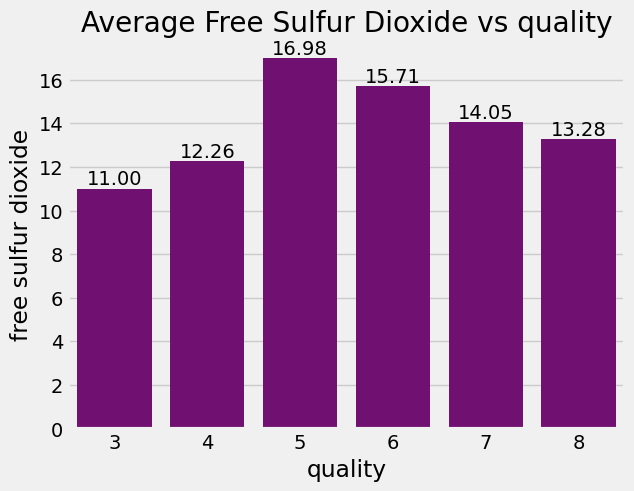

In [23]:
ax = sns.barplot(x=df['quality'], y=df['free sulfur dioxide'], estimator='mean', color='purple', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average Free Sulfur Dioxide vs quality')
plt.show()

&nbsp;&nbsp;  Apparently, the average of free sulfur dioxide increases until the level of quality reaches **5** **(16.98)**. As the quality increases, the average free sulfur dioxide turns to plummet at the highest quality.

#### Statistical Analysis of Free Sulfur Dioxide and Quality

In [24]:
#Kruskall Wallis
quality_3 = df[df['quality'] == 3]['free sulfur dioxide']
quality_4 = df[df['quality'] == 4]['free sulfur dioxide']
quality_5 = df[df['quality'] == 5]['free sulfur dioxide']
quality_6 = df[df['quality'] == 6]['free sulfur dioxide']
quality_7 = df[df['quality'] == 7]['free sulfur dioxide']
quality_8 = df[df['quality'] == 8]['free sulfur dioxide']
kw_fsd = st.kruskal(quality_3, quality_4, quality_5, quality_6, quality_7, quality_8)
print('pvalue :', kw_fsd.pvalue)
if kw_fsd.pvalue > 0.05:
  print('Fail to reject H0, free sulfur dioxide mean between quality do not have a significant differences')
else:
  print('H1 accepted, free sulfur dioxide mean between quality have a significant differences')

pvalue : 8.83609073000697e-06
H1 accepted, free sulfur dioxide mean between quality have a significant differences


#### Post-Hoc Analysis (Dunn's Test) Free Sulfur Dioxide-Quality

In [25]:
#Dunn's Test Free Sulfur Dioxide
dunn_fsd = sp.posthoc_dunn(a = [quality_3, quality_4, quality_5, quality_6,quality_7,quality_8])
duns = pd.DataFrame(data=dunn_fsd < 0.05) #show true for below p-Value/significantly difference
dunn_fsd = duns.rename(columns = {1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'}, index={1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'})
dunn_fsd.style.set_caption("Dunn's test Comparation of Free Sulfur Dioxide-Quality Groups ")

,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8
Q_3,False,False,True,False,False,False
Q_4,False,False,True,True,False,False
Q_5,True,True,False,False,True,False
Q_6,False,True,False,False,True,False
Q_7,False,False,True,True,False,False
Q_8,False,False,False,False,False,False


&nbsp;&nbsp;  With the exception of the groups of *6* and *8*, quality's group of *5* differs significantly from the others, as previously mentioned. According to Zoecklien et al. (1999), free sulfur dioxide is an unbounded or undissociated form of SO2 that is essential for regulating the microbial growth within the wine. Sulfur dioxide can enhance the wine's fruity and fresh flavors in terms of sensory perception (Monro et al., 2012). But because of the strong, unpleasant smell at higher quantities, which might degrade the quality of the wine, this is only recommended at lower doses (Blesic et al., 2014). Despite the graph's apparent wider gap between groups 5 and 8, Dunn's test reveals no discernible variations. Once again, it might occur as a result of the group quality of 8's inadequate sample size (18 samples as opposed to the group quality of 5's nearly 681 samples). These results could also be impacted by the severe outlier in free sulfur dioxide that is far from the mean.

### Total Sulfur Dioxide

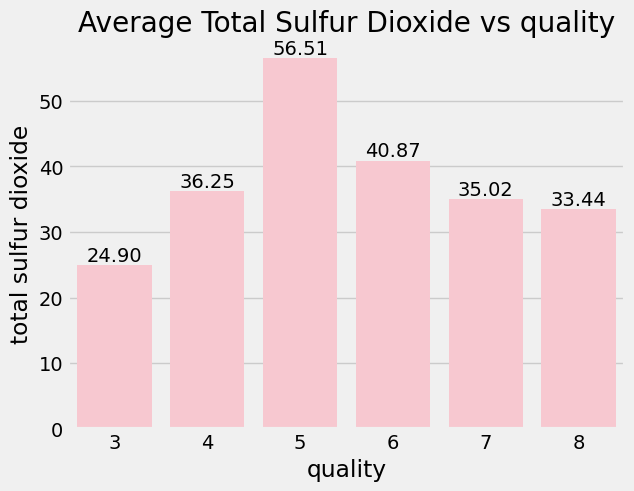

In [26]:
ax = sns.barplot(x=df['quality'], y=df['total sulfur dioxide'], estimator='mean', color='pink', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average Total Sulfur Dioxide vs quality')
plt.show()

&nbsp;&nbsp;  The highest mean of total sulfur dioxide *(56,51)* is located at the quality of *5*. The trend on the graphs shows an increase in the total sulfur dioxide from quality 3 to 5, and after that, it begins to plummet until it reaches quality 8.

#### Statistical Analysis of Total Sulfur Dioxide and Quality

In [27]:
#Kruskall Wallis
quality_3 = df[df['quality'] == 3]['total sulfur dioxide']
quality_4 = df[df['quality'] == 4]['total sulfur dioxide']
quality_5 = df[df['quality'] == 5]['total sulfur dioxide']
quality_6 = df[df['quality'] == 6]['total sulfur dioxide']
quality_7 = df[df['quality'] == 7]['total sulfur dioxide']
quality_8 = df[df['quality'] == 8]['total sulfur dioxide']
kw_tsd = st.kruskal(quality_3, quality_4, quality_5, quality_6, quality_7, quality_8)
print('pvalue :', kw_tsd.pvalue)
if kw_tsd.pvalue > 0.05:
  print('Fail to reject H0, total sulfur dioxide mean between quality do not have a significant differences')
else:
  print('H1 accepted, total sulfur dioxide mean between quality have a significant differences')

pvalue : 2.3602167590663723e-22
H1 accepted, total sulfur dioxide mean between quality have a significant differences


#### Post-Hoc Analysis (Dunn's Test) Total Sulfur Dioxide-Quality

In [28]:
#Dunn's Test Total Sulfur Dioxide
dunn_tsd = sp.posthoc_dunn(a = [quality_3, quality_4, quality_5, quality_6,quality_7,quality_8])
duns = pd.DataFrame(data=dunn_tsd < 0.05) #show true for below p-Value/significantly difference
dunn_tsd = duns.rename(columns = {1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'}, index={1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'})
dunn_tsd.style.set_caption("Dunn's test Comparation of Total Sulfur Dioxide-Quality Groups ")

,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8
Q_3,False,False,True,True,False,False
Q_4,False,False,True,False,False,False
Q_5,True,True,False,True,True,True
Q_6,True,False,True,False,True,False
Q_7,False,False,True,True,False,False
Q_8,False,False,True,False,False,False


&nbsp;&nbsp;  Based on the post-hoc results, a quality group of 5 depicts the differences with all other groups. This result is similar with free sulfur dioxide, so the research theory of Blesic et al. (2014) above can be applied. 'Total' sulfur dioxide means the sum of the free sulfur dioxide and bound dioxide (Zoecklein et al., 1999); thus, bound dioxide can be added to this dataset by calculating the sum of the total sulfur dioxide and the free sulfur dioxide.

### Density

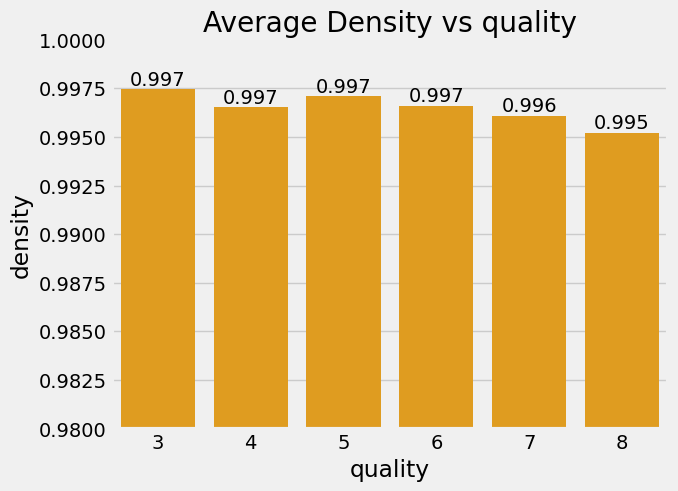

In [29]:
ax = sns.barplot(x=df['quality'], y=df['density'], estimator='mean', color='orange', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.ylim(0.98,1)
plt.title('Average Density vs quality')
plt.show()

&nbsp;&nbsp;  The average density shows a fluctuating trend, with a slight decrease toward the highest quality of **8**. The highest density **(0.997)** is in the quality of **3** to **6**, while the lowest is in the quality of **8** **(0.995)**.

#### Statistical Analysis of Density and Quality

In [30]:
#Kruskall Wallis
quality_3 = df[df['quality'] == 3]['density']
quality_4 = df[df['quality'] == 4]['density']
quality_5 = df[df['quality'] == 5]['density']
quality_6 = df[df['quality'] == 6]['density']
quality_7 = df[df['quality'] == 7]['density']
quality_8 = df[df['quality'] == 8]['density']
kw_density = st.kruskal(quality_3, quality_4, quality_5, quality_6, quality_7, quality_8)
print('pvalue :', kw_density.pvalue)
if kw_density.pvalue > 0.05:
  print('Fail to reject H0, density mean between quality do not have a significant differences')
else:
  print('H1 accepted, density mean between quality have a significant differences')

pvalue : 9.579606837067283e-13
H1 accepted, density mean between quality have a significant differences


#### Post-Hoc Analysis (Dunn's Test) Density-Quality

In [31]:
#Dunn's Test Density Sulfur Dioxide
dunn_density = sp.posthoc_dunn(a = [quality_3, quality_4, quality_5, quality_6,quality_7,quality_8])
duns = pd.DataFrame(data=dunn_density < 0.05) #show true for below p-Value/significantly difference
dunn_density = duns.rename(columns = {1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'}, index={1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'})
dunn_density.style.set_caption("Dunn's test Comparation of Density-Quality Groups ")

,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8
Q_3,False,False,False,False,True,True
Q_4,False,False,True,False,False,False
Q_5,False,True,False,True,True,True
Q_6,False,False,True,False,True,True
Q_7,True,False,True,True,False,False
Q_8,True,False,True,True,False,False


&nbsp;&nbsp;  Although the value displayed is similar, it appears that there are major value variations throughout the *4*, *5*, and *6* groups. Once more, these findings may be impacted by sample size heterogeneity across quality and outliers.
The prior study (Laguna et al., 2019) found a connection between alcohol and density. Alcohol rises and sugar falls during fermentation. The density of alcohol (0.791 g/cm2) is less than that of pure water (1 g/cm2) at 20 ◦C. Thus, the wine's density decreases with extended fermentation. The wine with the lowest density is the one that panelists like to select.

### pH

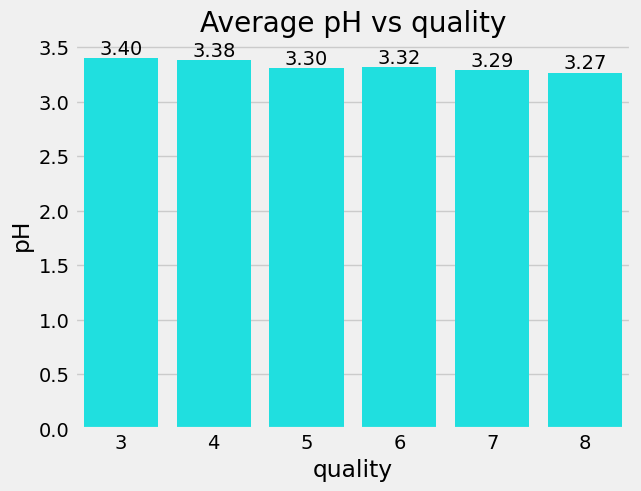

In [32]:
ax = sns.barplot(x=df['quality'], y=df['pH'], estimator='mean', color='#00ffff', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average pH vs quality')
plt.show()

&nbsp;&nbsp;  Based on the bar chart above, as the quality increases, the average pH value goes down. The highest pH is **(3.40)** within the quality of **3**, while the lowest pH is **(3.27)** at the quality of **8**.

#### Statistical Analysis of pH and Quality

In [33]:
#Kruskall Wallis
quality_3 = df[df['quality'] == 3]['pH']
quality_4 = df[df['quality'] == 4]['pH']
quality_5 = df[df['quality'] == 5]['pH']
quality_6 = df[df['quality'] == 6]['pH']
quality_7 = df[df['quality'] == 7]['pH']
quality_8 = df[df['quality'] == 8]['pH']
kw_pH = st.kruskal(quality_3, quality_4, quality_5, quality_6, quality_7, quality_8)
print('pvalue :', kw_pH.pvalue)
if kw_pH.pvalue > 0.05:
  print('Fail to reject H0, pH mean between quality do not have a significant differences')
else:
  print('H1 accepted, pH mean between quality have a significant differences')

pvalue : 0.0002439765647383132
H1 accepted, pH mean between quality have a significant differences


#### Post-Hoc Analysis (Dunn's Test) pH-Quality

In [34]:
#Dunn's Test pH
dunn_pH = sp.posthoc_dunn(a = [quality_3, quality_4, quality_5, quality_6,quality_7,quality_8])
duns = pd.DataFrame(data=dunn_pH < 0.05) #show true for below p-Value/significantly difference
dunn_pH = duns.rename(columns = {1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'}, index={1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'})
dunn_pH.style.set_caption("Dunn's test Comparation of pH-Quality Groups ")

,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8
Q_3,False,False,False,False,True,True
Q_4,False,False,True,True,True,True
Q_5,False,True,False,False,False,False
Q_6,False,True,False,False,True,False
Q_7,True,True,False,True,False,False
Q_8,True,True,False,False,False,False


&nbsp;&nbsp;  Dunn's results show significance between high-quality groups like *8* and *7* and low-quality groups like *3* and *4*.
Due to the juice and skins are blended during the fermentation of red wine, pH (power of hydrogen), ethanol, organic acid, and phenolics can affect sensory perceptions such as acidity, astrigency, and bitterness (Zoecklein et al., 1998).
The intensity of sourness, astrigency, and bitterness all increase with decreasing pH (Demiglio and Pickering, 2008; Sowalsky and Nobel, 1998). Based on these three sense experiences, one may argue that wine is typically preferred by customers.

### Sulphates

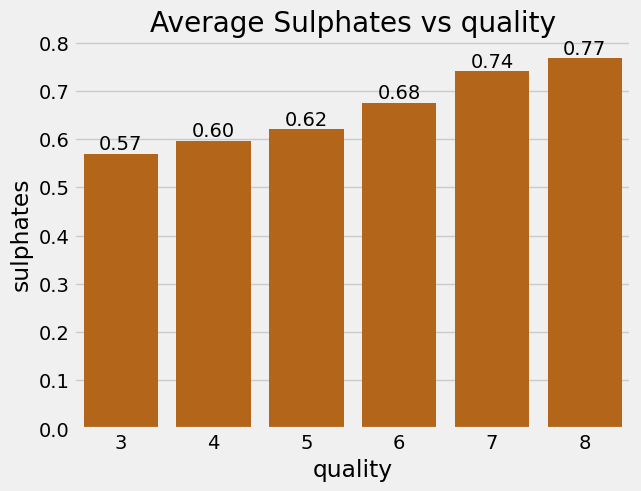

In [35]:
ax = sns.barplot(x=df['quality'], y=df['sulphates'], estimator='mean', color='#cc6600', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average Sulphates vs quality')
plt.show()

&nbsp;&nbsp;  The graphs suggest that adding more sulfates to wine could improve its quality. The lowest sulphates *(0.57)* is at the lowest quality of *3*, while the highest sulphates *(0.77)* at the highest quality of *8*.

#### Statistical Analysis of Sulphates and Quality

In [36]:
#Kruskall Wallis
quality_3 = df[df['quality'] == 3]['sulphates']
quality_4 = df[df['quality'] == 4]['sulphates']
quality_5 = df[df['quality'] == 5]['sulphates']
quality_6 = df[df['quality'] == 6]['sulphates']
quality_7 = df[df['quality'] == 7]['sulphates']
quality_8 = df[df['quality'] == 8]['sulphates']
kw_sulphates = st.kruskal(quality_3, quality_4, quality_5, quality_6, quality_7, quality_8)
print('pvalue :', kw_sulphates.pvalue)
if kw_sulphates.pvalue > 0.05:
  print('Fail to reject H0, sulphates mean between quality do not have a significant differences')
else:
  print('H1 accepted, sulphates mean between quality have a significant differences')

pvalue : 3.2932297464108236e-48
H1 accepted, sulphates mean between quality have a significant differences


#### Post-Hoc Analysis (Dunn's Test) Sulphates-Quality

In [37]:
#Dunn's Test Sulphates
dunn_sulphates = sp.posthoc_dunn(a = [quality_3, quality_4, quality_5, quality_6,quality_7,quality_8])
duns = pd.DataFrame(data=dunn_sulphates < 0.05) #show true for below p-Value/significantly difference
dunn_sulphates = duns.rename(columns = {1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'}, index={1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'})
dunn_sulphates.style.set_caption("Dunn's test Comparation of Sulphates-Quality Groups ")

,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8
Q_3,False,False,False,True,True,True
Q_4,False,False,True,True,True,True
Q_5,False,True,False,True,True,True
Q_6,True,True,True,False,True,True
Q_7,True,True,True,True,False,False
Q_8,True,True,True,True,False,False


&nbsp;&nbsp;  The comparison reveals that the group with the best quality *(8)* differs significant differences from other quality groups, except for *7*. Sulfate (SO<sub>4</sub><sup>2-</sup>-) and sulfite (SO<sub>3</sub><sup>2-</sup>-) are forms of sulfur that contribute to total sulfur dioxide (SO<sub>2</sub>) (Zoecklein et al., 1998). As a result, these ions connected to the results of total sulfur dioxide and free sulfur dioxide above, where addition of sulfur dioxide, at appropriate levels, could create fruity and fresh taste (Monro et al., 2012).

### Alcohol

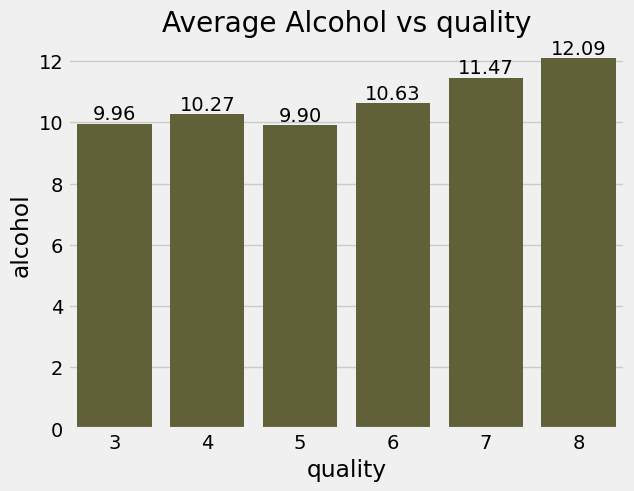

In [38]:
ax = sns.barplot(x=df['quality'], y=df['alcohol'], estimator='mean', color='#666633', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average Alcohol vs quality')
plt.show()

&nbsp;&nbsp;  There is a clear correlation between the rise in quality and the average alcohol. The largest value of average alcohol **(12.09)** is displayed by the greatest quality **8**, whilst quality **5** displays the lowest value of alcohol **(9.90)**.

#### Statistical Analysis of Alcohol and Quality

In [39]:
#Kruskall Wallis
quality_3 = df[df['quality'] == 3]['alcohol']
quality_4 = df[df['quality'] == 4]['alcohol']
quality_5 = df[df['quality'] == 5]['alcohol']
quality_6 = df[df['quality'] == 6]['alcohol']
quality_7 = df[df['quality'] == 7]['alcohol']
quality_8 = df[df['quality'] == 8]['alcohol']
kw_alcohol = st.kruskal(quality_3, quality_4, quality_5, quality_6, quality_7, quality_8)
print('pvalue :', kw_alcohol.pvalue)
if kw_alcohol.pvalue > 0.05:
  print('Fail to reject H0, alcohol mean between quality do not have a significant differences')
else:
  print('H1 accepted, alcohol mean between quality have a significant differences')

pvalue : 6.374168511102424e-87
H1 accepted, alcohol mean between quality have a significant differences


#### Post-Hoc Analysis (Dunn's Test) Alcohol-Quality

In [40]:
#Dunn's Test Alcohol
dunn_alcohol = sp.posthoc_dunn(a = [quality_3, quality_4, quality_5, quality_6,quality_7,quality_8])
duns = pd.DataFrame(data=dunn_alcohol < 0.05) #show true for below p-Value/significantly difference
dunn_alcohol = duns.rename(columns = {1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'}, index={1 : 'Q_3', 2 : 'Q_4', 3 : 'Q_5', 4 : 'Q_6', 5 : 'Q_7', 6 : 'Q_8'})
dunn_alcohol.style.set_caption("Dunn's test Comparation of Alcohol-Quality Groups ")

,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8
Q_3,False,False,False,False,True,True
Q_4,False,False,True,True,True,True
Q_5,False,True,False,True,True,True
Q_6,False,True,True,False,True,True
Q_7,True,True,True,True,False,False
Q_8,True,True,True,True,False,False


&nbsp;&nbsp;  It is clearly that highest average alcohol within the quality of *8* has a significant difference with other quality below it, except for quality of *7*. It can be said that choose to like the wine the the high alcohol content. Alcohol in form of ethanol is a major content in wine industry that determine the whole aspects in wine (Zoecklein et al., 1998).  Based on the previous research, ethanol influence sensory profiles such as bitterness, astrigency, sharp and gritty mouthfeel, the viscosity, and the length of flavor in wine (King et al., 2013).

## Multivariate Analysis
This step will show the correlation between all the features and targets using **Spearman's rank correlation** for non-parametric tests

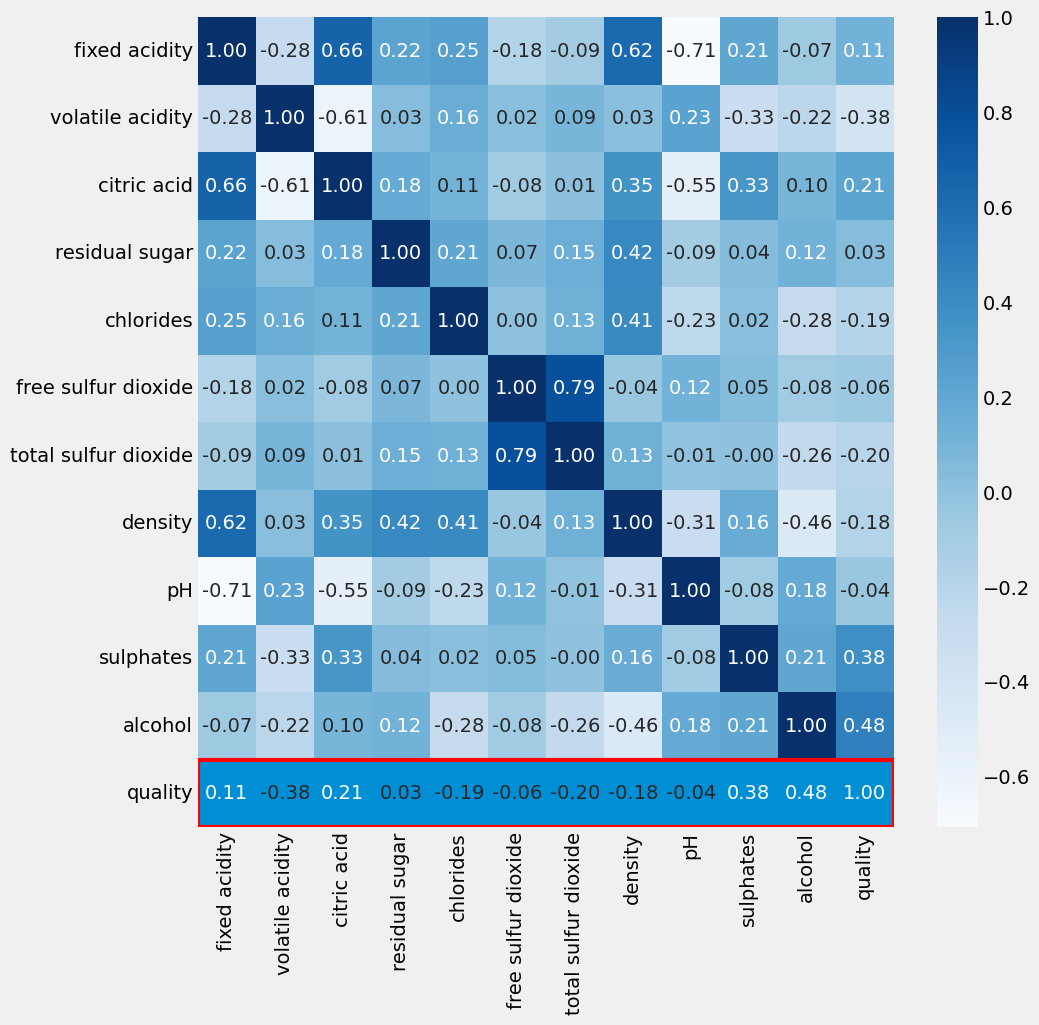

In [41]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(data=df.corr(method='spearman'), annot=True, cmap='Blues', fmt='.2f')
ax.add_patch(patches.Rectangle((0,11),12,1,edgecolor='red',lw=3))

&nbsp;&nbsp;  The data do not indicate a significant relationship between characteristics and quality. The only variables that exhibit weak to moderate connection are `sulfates, alcohol, citric acid, and fixed acidity`, while `volatile acidity, chlorides, total sulfur dioxide, and density` all exhibit negative correlation. `Residual sugar, free sulfur dioxide, and pH` show negligible correlation with quality. It can be seen that there are moderate to strong correlation between features excluding quality. Thus, *multicolinearity test* can be use to prove that.

In [42]:
VIF = pd.DataFrame()
variables = df[no_target]
VIF['Features'] = variables.columns
VIF['VIF'] = [variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]
VIF.sort_values(by='VIF', ascending=False)

,Features,VIF
7,density,1479.287209
8,pH,1070.967685
10,alcohol,124.394866
0,fixed acidity,74.452265
9,sulphates,21.590621
1,volatile acidity,17.060026
2,citric acid,9.183495
4,chlorides,6.554877
6,total sulfur dioxide,6.519699
5,free sulfur dioxide,6.442682


&nbsp;&nbsp; According to the table above, `density, pH, alcohol, fixed acidity, sulphates, volatile acidity` exhibit high value of VIF (Variance Inflation Factor) exceeding *10*. It indicates that these featurees have a tendency toward  *multicollinearity*. Although cleaning the features is actually necessary to strengthen the model, there is concern that this could weaken the pattern that the machine learning is using to learn because of the tiny sample size and feature count. Therefore, all features are retained in this project.

## Data Preprocessing
Cleaning the data for their missing and duplicated values

### Missing Value

In [43]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing values appear in this dataset

### Duplicate Value

In [44]:
print('Is there any duplicated value :', df.duplicated().any())
print('Total duplicated value :', df.duplicated().sum())
df[df.duplicated(keep=False) == True]

Is there any duplicated value : True
Total duplicated value : 240


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


The dataset shows 240 duplicate values that can be detrimental to model performance; therefore, they need to be removed.

In [45]:
df_nodupe = df.drop_duplicates()
print('Is there any duplicated value :', df_nodupe.duplicated().any())
print('Total duplicated value :', df_nodupe.duplicated().sum())

Is there any duplicated value : False
Total duplicated value : 0


### Split to Train and Test Data
&nbsp;&nbsp;  In order to build a model, the dataset needs to be split into test and train data. First, machine learning or a model will train with training data, and then evaluate its performance by testing it on test data. The common proportion between train and test data is 80% and 20%, respectively.

In [46]:
inputs = df_nodupe.drop('quality', axis = 1)
target = df_nodupe['quality']
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, test_size = 0.2, random_state=17)

## Feature Engineering
&nbsp;&nbsp;  After data cleaning and transformation, feature engineering is the next step that can improve the prediction power of machine learning by generating new features from raw data, feature encoding, feature selection, etc. Feature engineering steps of this project are:
1. Create `total acidity` based on the formula `total acidity = fixed acidity + volatile acidity'.
2. Create `bound sulfur dioxide` based on the formula `bound sulfur dioxide = total sulfur dioxide minus free sulfur dioxide'.
3. Encode the target `quality` into **0** and **1** to build a binary classification model. Since the quality numbers are 8, quality was divided into **0 = bad** with a **quality <= 5 *, while 1 = good** with a **quality > 5** to make them balanced.


In [47]:
#Create new features of total acidity and bound sulfur dioxide
X_train['total acidity'] = X_train['fixed acidity'] + X_train['volatile acidity']
X_test['total acidity'] = X_test['fixed acidity'] + X_test['volatile acidity']
X_train['bound sulfur dioxide'] = X_train['total sulfur dioxide'] - X_train['free sulfur dioxide']
X_test['bound sulfur dioxide'] = X_test['total sulfur dioxide'] - X_test['free sulfur dioxide']

In [48]:
#Change the quality into the classification with a condition above
Y_train= Y_train.apply(lambda x: 0 if x <= 5 else 1)
Y_test = Y_test.apply(lambda x: 0 if x <= 5 else 1)
Y_train.value_counts()

quality
1    568
0    519
Name: count, dtype: int64

## Create the Pie chart of proportions above

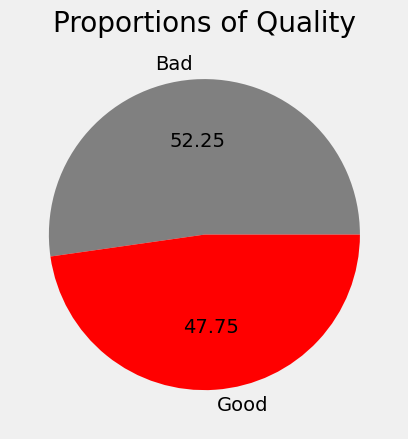

In [49]:
labels = ['Bad','Good']
plt.pie(x = Y_train.value_counts(), labels = labels, colors = ['gray','red'], autopct = '%.2f')
plt.title('Proportions of Quality')
plt.show()

&nbsp;&nbsp;  The target's proportions are nearly balanced, with the majority of bad quality is greater than good quality. Nevertheless, this data can move on to the model building phase, therefore changing the sampling proportions is not required.  

### Handling the outlier
&nbsp;&nbsp;  This project utilizes a comparison between the `Z-score` and `Interquartile Range} (IQR)` to exclude the outlier. Z-score threshold can be define as 3, above that score can be categorized as outliers. IQR eliminates outliers that fall outside the range between Q1 (lower quartile) and Q3 (upper quartile).

In [50]:
z_train = X_train.copy()
iqr_train = X_train.copy()

#Handling outlier z_score
for i in z_train.columns:
  zscore_train = np.abs(stats.zscore(z_train[i]))
  z_filtered_train = (zscore_train < 3)
  z_train = z_train[z_filtered_train]

#Handling outlier IQR
for i in iqr_train.columns:
  q1_train = iqr_train[i].quantile(0.25)
  q3_train = iqr_train[i].quantile(0.75)
  iqr_calc_train = q3_train-q1_train
  low_limit_train = q1_train - (1.5 * iqr_calc_train)
  high_limit_train = q3_train + (1.5 * iqr_calc_train)
  iqr_filtered_train = ((iqr_train[i] >= low_limit_train) & (iqr_train[i] <= high_limit_train))
  iqr_train = iqr_train[iqr_filtered_train]
print('Total train data bservations before remove outlier :', X_train.shape[0])
print('Total train data after treated with z-score :', z_train.shape[0])
print('Total train data after treated with iqr :', iqr_train.shape[0])

Total train data bservations before remove outlier : 1087
Total train data after treated with z-score : 957
Total train data after treated with iqr : 744


Text(0.5, 0.98, 'Train Data Distribution after Z-score ')

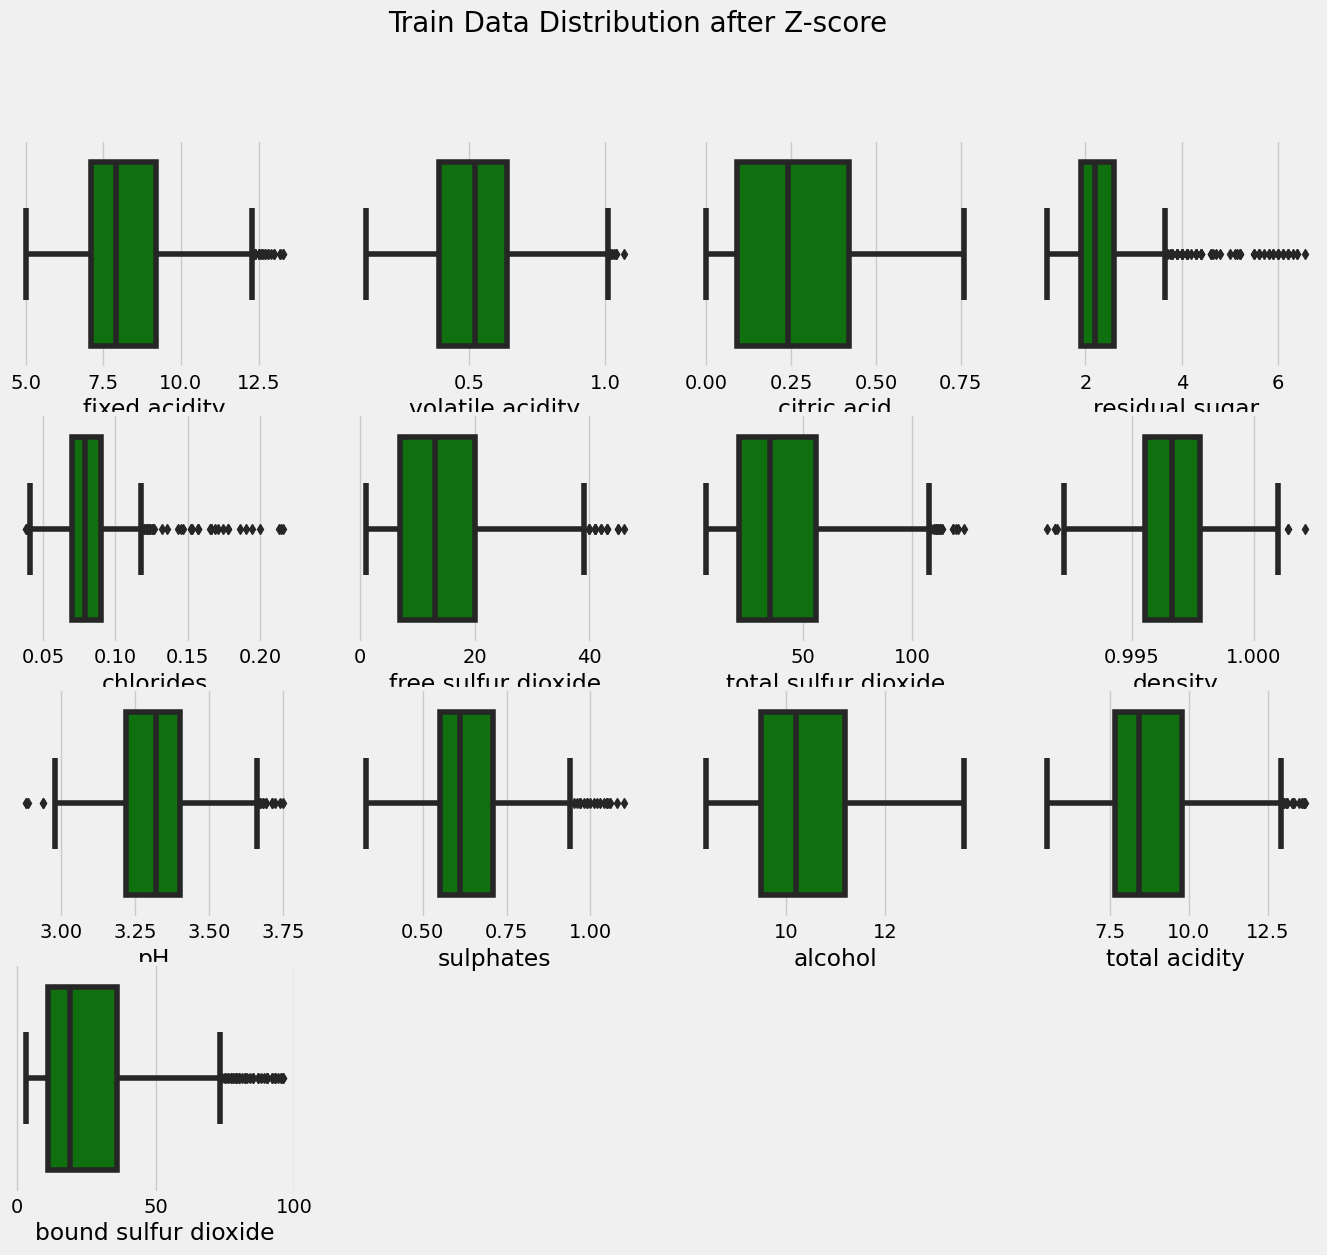

In [51]:
#Boxplot distribution after outlier removal (Zscore)
features = z_train.columns.tolist()
plt.figure(figsize=(15,13))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  ax = sns.boxplot(x=z_train[features[i]], color='green', orient='h')
plt.suptitle('Train Data Distribution after Z-score ', fontsize = 20)

Text(0.5, 0.98, 'Train Data Distribution after IQR ')

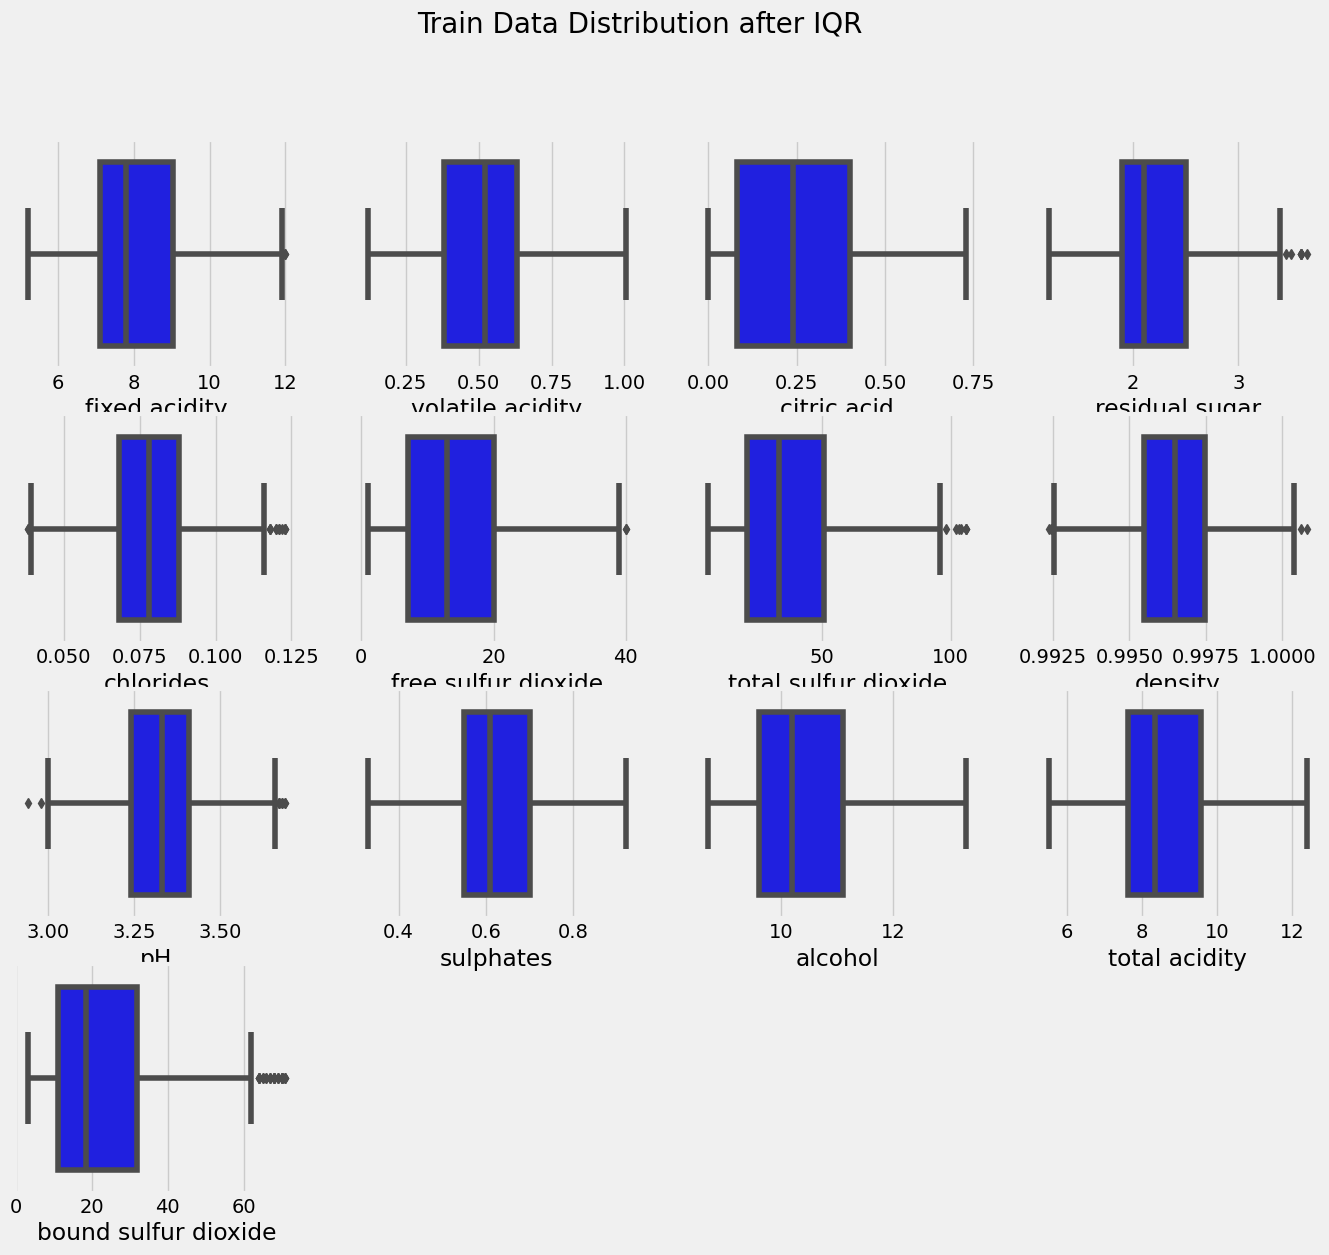

In [52]:
#Boxplot distribution after outlier removal (IQR)
features = iqr_train.columns.tolist()
plt.figure(figsize=(15,13))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  ax = sns.boxplot(x=iqr_train[features[i]], color='blue', orient='h')
plt.suptitle('Train Data Distribution after IQR ', fontsize = 20)

&nbsp;&nbsp;  Approximately **294** outliers were eliminated using the IQR approach, compared to **112** for the z-score. As a result, the distribution of the above graph's IQR is superior to that of the zscore. Although the performance IQR is great, but this method eliminates almost 27% of the entire data, leaving only **1305** usable data. Tiny data can only provide less information and pattern for the machine learning to train and predict the target. Therefore, this project uses *z-score* approach to preserve the data and proceed to do normalization to help balanced the leftover skeweed data.

In [53]:
print('Total X train after cleaning the outlier :', z_train.shape[0])
print('Total Y train :', Y_train.shape[0])

Total X train after cleaning the outlier : 957
Total Y train : 1087


&nbsp;&nbsp;  The inconsistencies of the X train and Y train observations size could create error in the future, since it generate null values (NaN) when training the model. The solution is merge them again, drop the null value, and then split them again.  

In [54]:
# concatenate the features (X) and target (Y)
train = pd.concat([z_train,Y_train], axis=1, join='inner')
X_train = train.drop('quality', axis=1)
Y_train = train['quality']
print(X_train.shape)
print(Y_train.shape)

(957, 13)
(957,)


## Feature Transformation
&nbsp;&nbsp;  The dataset needs to be transformed in order to correct the skewed distribution and normalize the distribution. Through this process, machine learning will be able to understand our data more simply and ultimately become more predictive. One transformation technique that can be applied to both positive and negative data values is `Yeo-Johnson`. This method's basic idea is to move the left- and right-skewed data to the central distribution (Nwakuya and Anyaogu, 2022). Furthermore, by scaling all features into a tiny interval, it guarantees the small and similar magnitude of each feature.

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

Text(0.5, 0.98, 'Train Data Distribution after Yeo-Johnson Transformation ')

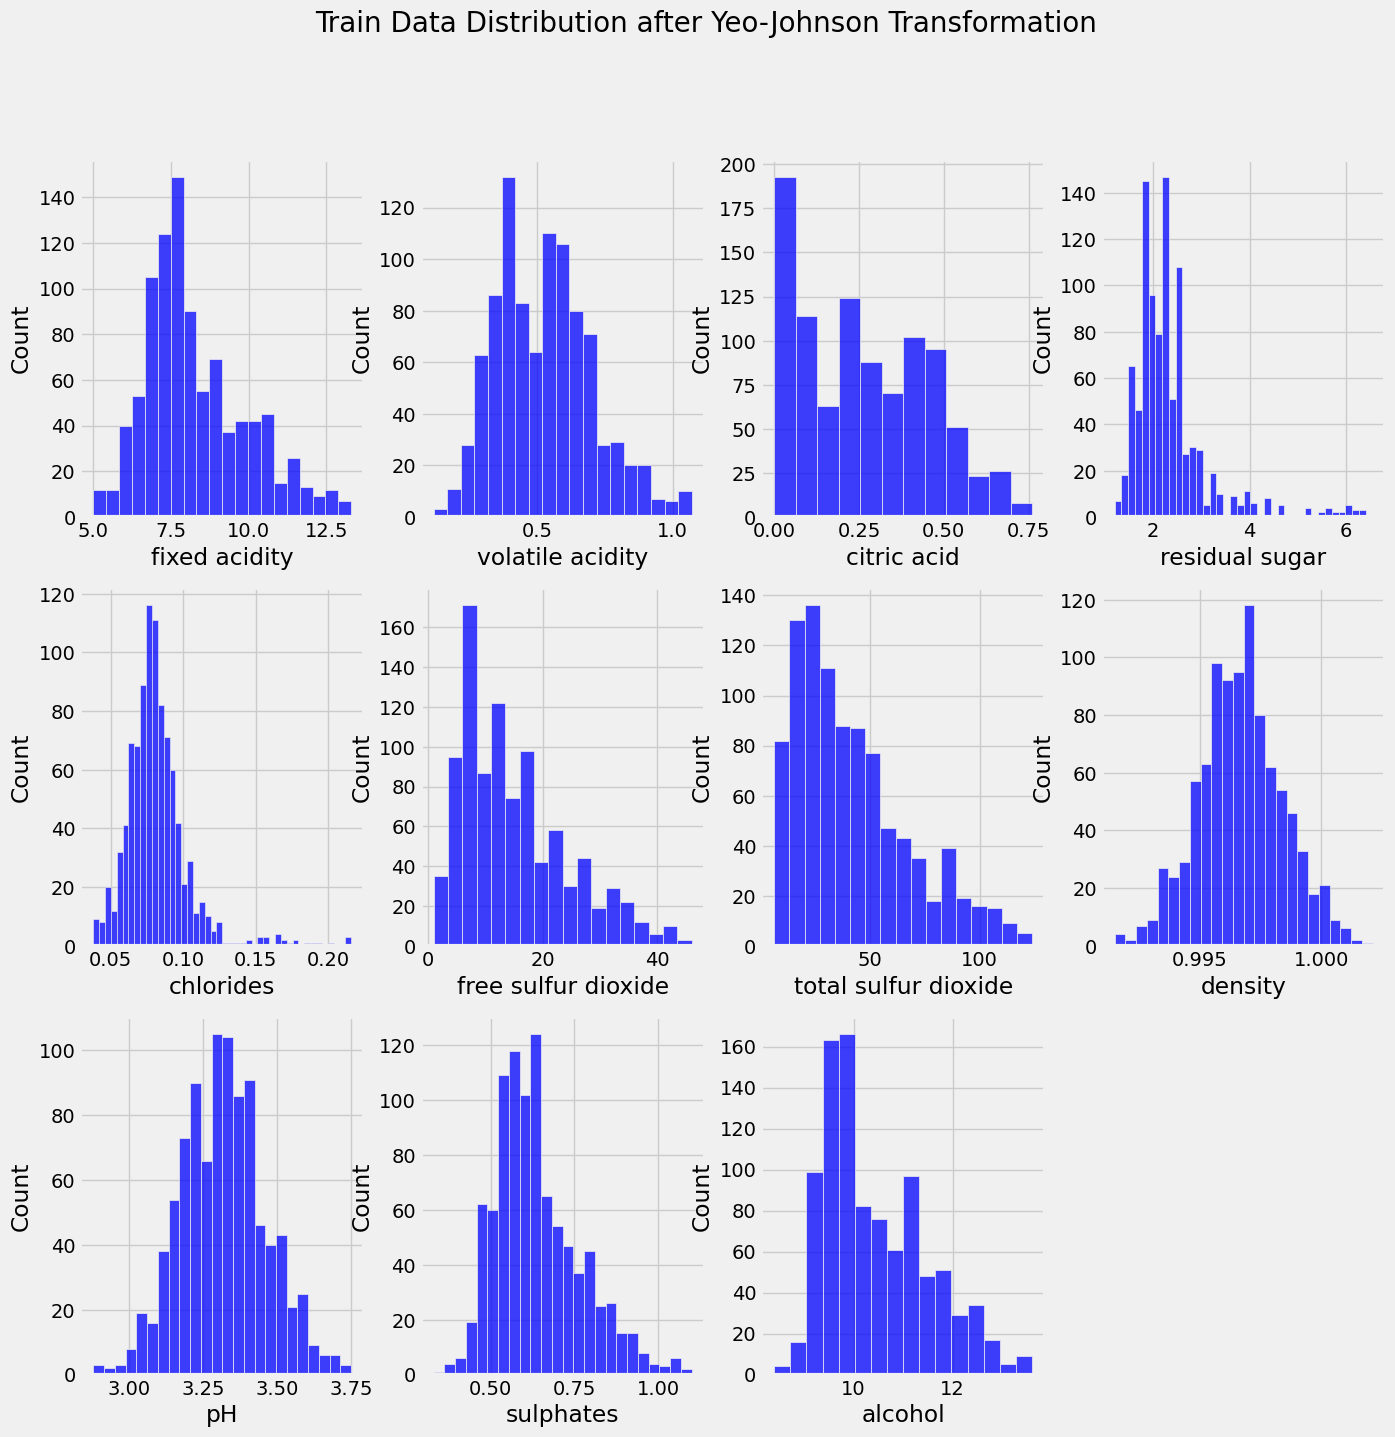

In [55]:
#Show Yeo-Johnson Transformation distribution
X_train_trf = X_train.copy()
X_test_trf = X_test.copy()
for i in X_train_trf.columns:
  power = PowerTransformer(method='yeo-johnson')
  power.fit(X_train[[i]])
  X_train_trf[i] = power.transform(X_train_trf[[i]]).ravel()
  X_test_trf[i] = power.transform(X_test_trf[[i]]).ravel()

#Check the Histogram Distribution
plt.figure(figsize=(15,15))
for i in range(0, len(no_target)):
  plt.subplot(3, 4, i+1)
  ax = sns.histplot(X_train[no_target[i]], color='blue')
plt.suptitle('Train Data Distribution after Yeo-Johnson Transformation ', fontsize = 20)

In [56]:
# Check the Data Normality using D'Agostino-Pearson Normality Test
for i in range(len(no_target)):
  norm = st.normaltest(np.array(X_train_trf[no_target[i]]))
  if norm.pvalue > 0.05:
    print('p-Value of train', no_target[i], 'is :', norm.pvalue, 'can be categorize as Normal')
  else:
    print('p-Value of train', no_target[i], 'is :', norm.pvalue, 'can be categorize as Not Normal')

p-Value of train fixed acidity is : 0.0888699877020199 can be categorize as Normal
p-Value of train volatile acidity is : 0.0014690152948222154 can be categorize as Not Normal
p-Value of train citric acid is : 4.728356110125092e-121 can be categorize as Not Normal
p-Value of train residual sugar is : 0.2679929670758283 can be categorize as Normal
p-Value of train chlorides is : 1.1994915101631282e-05 can be categorize as Not Normal
p-Value of train free sulfur dioxide is : 6.549430575809503e-18 can be categorize as Not Normal
p-Value of train total sulfur dioxide is : 6.915211729499078e-19 can be categorize as Not Normal
p-Value of train density is : 0.9999397507665376 can be categorize as Normal
p-Value of train pH is : 0.9998430507188769 can be categorize as Normal
p-Value of train sulphates is : 0.7031838216798312 can be categorize as Normal
p-Value of train alcohol is : 1.279800291964605e-36 can be categorize as Not Normal


&nbsp;&nbsp;  It is evident that following the transformation, practically several features shifted in the direction of a Gaussian or normal distribution. Only `fixed acidity, residual sugar, density, pH, and sulfates` become normal after the transformation. Again, the extreme outlier, the small sample size, and the high degree of data inconsistency are the causes of it. All things considered, models can still be constructed using this data.

### Feature Selection
&nbsp;&nbsp;  After cleaning and transforming the dataset, feature need to be choose based on their relationship with the target variable using statistical method. This step lower computational cost and improve the model quality. The `ANOVA f-test` was employed in this project to determine feature variances and select the best feature.

Text(0.5, 1.0, 'Feature Selection based on ANOVA Classification')

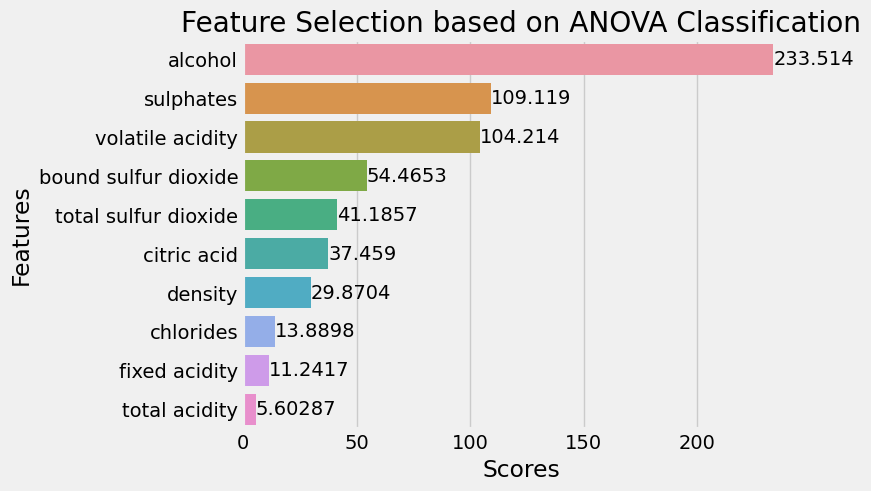

In [57]:
# ANOVA f - class
fs = SelectKBest(k=10).fit(X_train, Y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

names = X_train.columns.values[fs.get_support()]
score = fs.scores_[fs.get_support()]
names_scores = list(zip(names,score))
fs_anova = pd.DataFrame(data=names_scores, columns = ['Features', 'Scores'])
fs_sort = fs_anova.sort_values('Scores', ascending=False)
ax = sns.barplot(data=fs_sort, x='Scores', y='Features')
ax.bar_label(ax.containers[0])
plt.title('Feature Selection based on ANOVA Classification')

&nbsp;&nbsp;  The best significant feature for the target is `alcohol` and the least importance is `total acidity`. Basically, the lowest ANOVA value need to be removed. For the same reason as with the VIF, every feature ought to be kept.

## Modelling
Model was created subsequent to preprocessing step. Type of machine learning's models used in this projects are :
1. Logistic Regression (REG)
2. Support Vector Machine (SVM)
3. Decision Tree Classifier (DTC)
4. XGBoost Classifier (XGB)
5. Random Forest Classifier (RFC) <br>

&nbsp;&nbsp; To prevent data leakage between train and test data as well as assembling workflow of preprocessing step and modelling, `Pipeline` was applied in this project. **Pipeline** is capable to manage transformation (yeo-johnson) and model in data train and then transform it into test data <br>

&nbsp;&nbsp; After create a model to predict the target, it is mandatory to evaluate the model performance and choose the best by the highest values of the metrics evaluation. The metrics used are :
1. Precision
2. Recall
3. Accuracy
4. Area Under ROC Curve (ROC AUC)
5. Cross Validation (Standard Deviation) of all 5 metrics above <br>

&nbsp;&nbsp;  One of the most crucial elements in the food industry is **Customer Satisfaction**, particularly in the wine producing sector. To maintain its customer loyalty, the wine industry needs to continue producing **good-quality wine (1)**. Because of this, the primary evaluation indicator for this project is the `Precision score`, which has the potential to reduce **False Positive** situations in which the model predicts that the wine quality is *good (1)* but the real outcomes are *bad (0)*. To enhance precision and decrease false positives, it is necessary to raise the probability threshold beyond the default values of 0.5 or 50%. In this project, the model to predict `good (1)` wine uses a `probability threshold >= 0.75`.

In [58]:
#create function to show the metrics results for each model
def eval_metrics(y_train, y_test, y_pred_train, y_pred_test):
  #store the metrics
  precision_train = precision_score(Y_train, Y_pred_train)
  precision_test = precision_score(Y_test, Y_pred_test)
  recall_train = recall_score(Y_train, Y_pred_train)
  recall_test = recall_score(Y_test, Y_pred_test)
  accuracy_train = accuracy_score(Y_train, Y_pred_train)
  accuracy_test = accuracy_score(Y_test, Y_pred_test)
  roc_train = roc_auc_score(Y_train, Y_pred_train)
  roc_test = roc_auc_score(Y_test, Y_pred_test)

  #show the score
  print('precision train score:', precision_train)
  print('precision test score:', precision_test)
  print('recall train score:', recall_train)
  print('recall test score:', recall_test)
  print('accuracy train score:', accuracy_train)
  print('accuracy test score:', accuracy_test)
  print('roc auc train score:', roc_train)
  print('roc auc test score:', roc_test)


  #show the confusion matrix
  cm_test = confusion_matrix(Y_test, Y_pred_test)
  cm_display = ConfusionMatrixDisplay(cm_test, display_labels=['Bad (0)','Good (1)'])
  cm_display.plot(cmap='Blues',colorbar=False)
  plt.grid(None)
  plt.show()

  #store into list
  result_train = [precision_train, recall_train, accuracy_train, roc_train]
  result_test = [precision_test, recall_test, accuracy_test, roc_test]
  return result_train, result_test

In [59]:
#Create function contains cross validation for every model
metrics_list = ['recall', 'precision', 'accuracy', 'roc_auc']
def cv_metrics(model):
  cv = cross_validate(model, X_train, Y_train, scoring=metrics_list, cv=5, return_train_score=True)
  print('Standard deviation of precision train :', cv['train_precision'].std())
  print('Standard deviation of precision test :', cv['test_precision'].std())
  print('Standard deviation of recall train :', cv['train_recall'].std())
  print('Standard deviation of recall test :', cv['test_recall'].std())
  print('Standard deviation of accuracy train :', cv['train_accuracy'].std())
  print('Standard deviation of accuracy test :', cv['test_accuracy'].std())
  print('Standard deviation of roc_auc train :', cv['train_roc_auc'].std())
  print('Standard deviation of roc_auc test :', cv['test_roc_auc'].std())
  #Store into list
  cv_train = [cv['train_precision'].std(), cv['train_recall'].std(), cv['train_accuracy'].std(), cv['train_roc_auc'].std()]
  cv_test = [cv['test_precision'].std(), cv['test_recall'].std(), cv['test_accuracy'].std(), cv['test_roc_auc'].std()]
  return cv_train, cv_test

### Logistic Regression

precision train score: 0.8788927335640139
precision test score: 0.9310344827586207
recall train score: 0.49034749034749037
recall test score: 0.5364238410596026
accuracy train score: 0.6875653082549634
accuracy test score: 0.7205882352941176
roc auc train score: 0.7053104194334263
roc auc test score: 0.7434185321000492


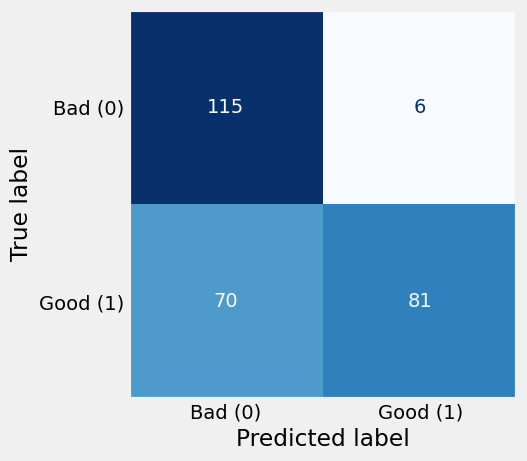

In [60]:
reg = LogisticRegression(random_state=17)
pipe_reg = Pipeline([('transform' , power), ('model', reg)])
pipe_reg.fit(X_train, Y_train)
Y_pred_train = pipe_reg.predict_proba(X_train)[:,1]
Y_pred_test = pipe_reg.predict_proba(X_test)[:,1]
Y_pred_train = [1 if i >= 0.75 else 0 for i in Y_pred_train]
Y_pred_test = [1 if i >= 0.75 else 0 for i in Y_pred_test]
result_train_reg, result_test_reg = eval_metrics(Y_train, Y_test, Y_pred_train, Y_pred_test)

In [61]:
cv_train_reg, cv_test_reg = cv_metrics(pipe_reg)

Standard deviation of precision train : 0.010055169968188636
Standard deviation of precision test : 0.0329110212492707
Standard deviation of recall train : 0.00691785599904647
Standard deviation of recall test : 0.022704124239953827
Standard deviation of accuracy train : 0.008835520517769105
Standard deviation of accuracy test : 0.02028072620640113
Standard deviation of roc_auc train : 0.007109578501875521
Standard deviation of roc_auc test : 0.031160729028476605


### Support Vector Machine

precision train score: 0.9221183800623053
precision test score: 0.9111111111111111
recall train score: 0.5714285714285714
recall test score: 0.543046357615894
accuracy train score: 0.741901776384535
accuracy test score: 0.7169117647058824
roc auc train score: 0.7572404816140579
roc auc test score: 0.7384653275682777


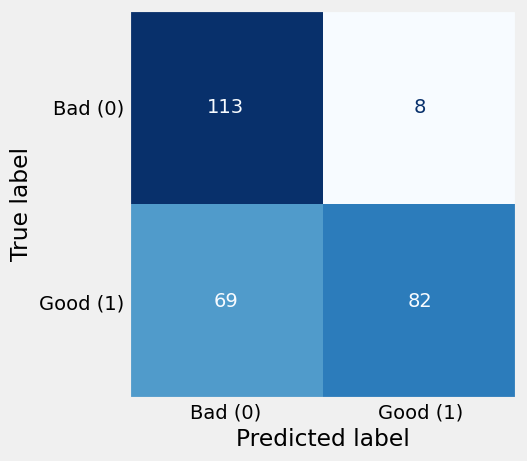

In [62]:
svm = SVC(probability=True, random_state=17)
pipe_svm = Pipeline([('transform' , power), ('model', svm)])
pipe_svm.fit(X_train, Y_train)
Y_pred_train = pipe_svm.predict_proba(X_train)[:,1]
Y_pred_test = pipe_svm.predict_proba(X_test)[:,1]
Y_pred_train = [1 if i >= 0.75 else 0 for i in Y_pred_train]
Y_pred_test = [1 if i >= 0.75 else 0 for i in Y_pred_test]
result_train_svm, result_test_svm = eval_metrics(Y_train, Y_test, Y_pred_train, Y_pred_test)

In [63]:
cv_train_svm, cv_test_svm = cv_metrics(pipe_svm)

Standard deviation of precision train : 0.004656237811048131
Standard deviation of precision test : 0.03264449841242797
Standard deviation of recall train : 0.009638913696136895
Standard deviation of recall test : 0.051954805990430515
Standard deviation of accuracy train : 0.002846073986820464
Standard deviation of accuracy test : 0.02279956477035834
Standard deviation of roc_auc train : 0.003195323876192961
Standard deviation of roc_auc test : 0.023820408040776755


### Decision Tree

precision train score: 1.0
precision test score: 0.7266666666666667
recall train score: 1.0
recall test score: 0.7218543046357616
accuracy train score: 1.0
accuracy test score: 0.6948529411764706
roc auc train score: 1.0
roc auc test score: 0.691505664714575


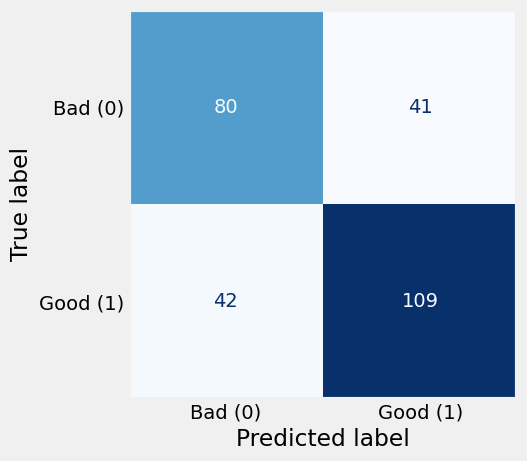

In [64]:
dtc = DecisionTreeClassifier(random_state=17)
pipe_dtc = Pipeline([('transform' , power), ('model', dtc)])
pipe_dtc.fit(X_train, Y_train)
Y_pred_train = pipe_dtc.predict_proba(X_train)[:,1]
Y_pred_test = pipe_dtc.predict_proba(X_test)[:,1]
Y_pred_train = [1 if i >= 0.75 else 0 for i in Y_pred_train]
Y_pred_test = [1 if i >= 0.75 else 0 for i in Y_pred_test]
result_train_dtc, result_test_dtc = eval_metrics(Y_train, Y_test, Y_pred_train, Y_pred_test)

In [65]:
cv_train_dtc, cv_test_dtc = cv_metrics(pipe_dtc)

Standard deviation of precision train : 0.0
Standard deviation of precision test : 0.023070364315936245
Standard deviation of recall train : 0.0
Standard deviation of recall test : 0.038024216396847645
Standard deviation of accuracy train : 0.0
Standard deviation of accuracy test : 0.01878030269015941
Standard deviation of roc_auc train : 0.0
Standard deviation of roc_auc test : 0.01899700496064759


### Extreme Gradient Boost (XGBoost)

precision train score: 1.0
precision test score: 0.7266666666666667
recall train score: 1.0
recall test score: 0.7218543046357616
accuracy train score: 1.0
accuracy test score: 0.6948529411764706
roc auc train score: 1.0
roc auc test score: 0.691505664714575


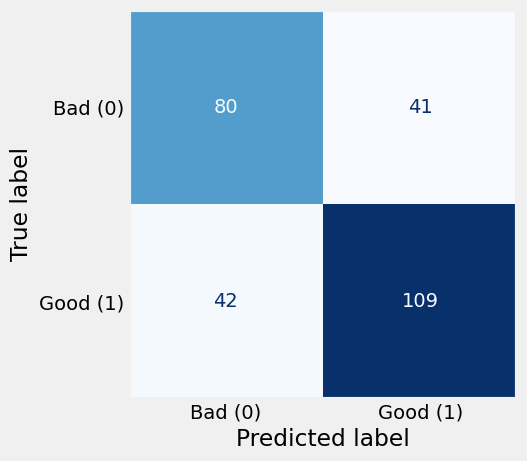

In [66]:
xgb = XGBClassifier(random_state=17)
pipe_xgb = Pipeline([('transform' , power), ('model', dtc)])
pipe_xgb.fit(X_train, Y_train)
Y_pred_train = pipe_xgb.predict_proba(X_train)[:,1]
Y_pred_test = pipe_xgb.predict_proba(X_test)[:,1]
Y_pred_train = [1 if i >= 0.75 else 0 for i in Y_pred_train]
Y_pred_test = [1 if i >= 0.75 else 0 for i in Y_pred_test]
result_train_xgb, result_test_xgb = eval_metrics(Y_train, Y_test, Y_pred_train, Y_pred_test)

In [67]:
cv_train_xgb, cv_test_xgb = cv_metrics(pipe_xgb)

Standard deviation of precision train : 0.0
Standard deviation of precision test : 0.023070364315936245
Standard deviation of recall train : 0.0
Standard deviation of recall test : 0.038024216396847645
Standard deviation of accuracy train : 0.0
Standard deviation of accuracy test : 0.01878030269015941
Standard deviation of roc_auc train : 0.0
Standard deviation of roc_auc test : 0.01899700496064759


### Random Forest Classifier

precision train score: 1.0
precision test score: 0.7266666666666667
recall train score: 1.0
recall test score: 0.7218543046357616
accuracy train score: 1.0
accuracy test score: 0.6948529411764706
roc auc train score: 1.0
roc auc test score: 0.691505664714575


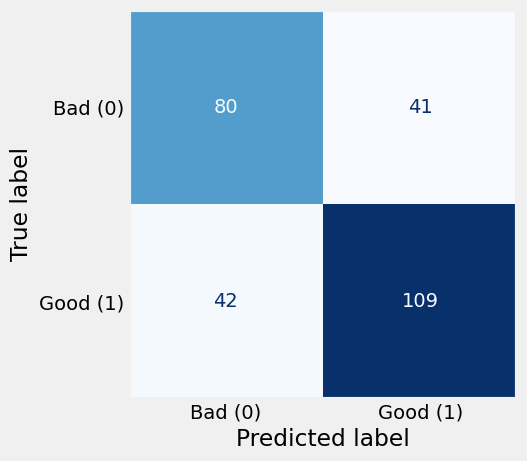

In [68]:
rfc = RandomForestClassifier(random_state=17)
pipe_rfc = Pipeline([('transform' , power), ('model', dtc)])
pipe_rfc.fit(X_train, Y_train)
Y_pred_train = pipe_rfc.predict_proba(X_train)[:,1]
Y_pred_test = pipe_rfc.predict_proba(X_test)[:,1]
Y_pred_train = [1 if i >= 0.75 else 0 for i in Y_pred_train]
Y_pred_test = [1 if i >= 0.75 else 0 for i in Y_pred_test]
result_train_rfc, result_test_rfc = eval_metrics(Y_train, Y_test, Y_pred_train, Y_pred_test)

In [69]:
cv_train_rfc, cv_test_rfc = cv_metrics(rfc)

Standard deviation of precision train : 0.0
Standard deviation of precision test : 0.03083458932812528
Standard deviation of recall train : 0.0
Standard deviation of recall test : 0.04046191282394377
Standard deviation of accuracy train : 0.0
Standard deviation of accuracy test : 0.013917116446482969
Standard deviation of roc_auc train : 4.965068306494546e-17
Standard deviation of roc_auc test : 0.021758651152683415


### Performance Comparation between Models

In [70]:
index_model = ['precision train', 'precision test', 'recall train','recall test',
               'accuracy train', 'accuracy test', 'roc auc train','roc auc test',
               'std precision train','std precision test', 'std recall train',
               'std recall test', 'std accuracy train', 'std accuracy test', 'std roc auc train',
               'std roc auc test']
compare = round(pd.DataFrame({'REG' : [result_train_reg[0], result_test_reg[0], result_train_reg[1], result_test_reg[1], result_train_reg[2],
                                 result_test_reg[2], result_train_reg[3], result_test_reg [3], cv_train_reg[0], cv_test_reg[0], cv_train_reg[1],
                                 cv_test_reg[1], cv_train_reg[2], cv_test_reg[2], cv_train_reg[3], cv_test_reg[3]],
                        'SVM' : [result_train_svm[0], result_test_svm[0], result_train_svm[1], result_test_svm[1], result_train_svm[2],
                                 result_test_svm[2], result_train_svm[3], result_test_svm[3], cv_train_svm[0], cv_test_svm[0], cv_train_svm[1],
                                 cv_test_svm[1], cv_train_svm[2], cv_test_svm[2], cv_train_svm[3], cv_test_svm[3]],
                        'DTC' : [result_train_dtc[0], result_test_dtc[0], result_train_dtc[1], result_test_dtc[1], result_train_dtc[2],
                                 result_test_dtc[2], result_train_dtc[3], result_test_dtc[3], cv_train_dtc[0], cv_test_dtc[0], cv_train_dtc[1],
                                 cv_test_dtc[1], cv_train_dtc[2], cv_test_dtc[2], cv_train_dtc[3], cv_test_dtc[3]],
                        'XGB' : [result_train_xgb[0], result_test_xgb[0], result_train_xgb[1], result_test_xgb[1], result_train_xgb[2],
                                 result_test_xgb[2], result_train_xgb[3], result_test_xgb[3], cv_train_xgb[0], cv_test_xgb[0], cv_train_xgb[1],
                                 cv_test_xgb[1], cv_train_xgb[2], cv_test_xgb[2], cv_train_xgb[3], cv_test_xgb[3]],
                        'RFC' : [result_train_rfc[0], result_test_rfc[0], result_train_rfc[1], result_test_rfc[1], result_train_rfc[2],
                                 result_test_rfc[2], result_train_rfc[3], result_test_rfc[3], cv_train_rfc[0], cv_test_rfc[0], cv_train_rfc[1],
                                 cv_test_rfc[1], cv_train_rfc[2], cv_test_rfc[2], cv_train_rfc[3], cv_test_rfc[3]]}, index = index_model)*100,0)
compare.style.set_caption('Performance Comparation between Models (%)')

,REG,SVM,DTC,XGB,RFC
precision train,88.000000,92.000000,100.000000,100.000000,100.000000
precision test,93.000000,91.000000,73.000000,73.000000,73.000000
recall train,49.000000,57.000000,100.000000,100.000000,100.000000
recall test,54.000000,54.000000,72.000000,72.000000,72.000000
accuracy train,69.000000,74.000000,100.000000,100.000000,100.000000
accuracy test,72.000000,72.000000,69.000000,69.000000,69.000000
roc auc train,71.000000,76.000000,100.000000,100.000000,100.000000
roc auc test,74.000000,74.000000,69.000000,69.000000,69.000000
std precision train,1.000000,0.000000,0.000000,0.000000,0.000000
std precision test,3.000000,3.000000,2.000000,2.000000,3.000000


&nbsp;&nbsp;  According to the aforementioned results, the `SVM` model's precision test **(92%)** and train **(91%)** showed the highest percentages without exhibiting any *overfitting* at the precision test's standard deviation (std). Even though the ROC-AUC only displays 74% and 72%, this model can still be used because it is still fairly good. Hence, for our project, `SVM` is the optimal model that can move on to `Hyperparameter Tuning`.

### Hyperparameter Tuning
&nbsp;&nbsp;  In this step, SVM will be optimized by its parameters to increase its performance using the method of random search. `RandomizedSearchCV` is a hyperparameter technique that searches samples randomly and finds the optimal value of each parameter, then cross-validates them in order to get the best model performance. This method could save more time and have a lower computational cost than **Grid Search CV** <br>

precision train score: 0.8807017543859649
precision test score: 0.9418604651162791
recall train score: 0.48455598455598453
recall test score: 0.5364238410596026
accuracy train score: 0.6854754440961337
accuracy test score: 0.7242647058823529
roc auc train score: 0.7035536187016824
roc auc test score: 0.7475507635050079


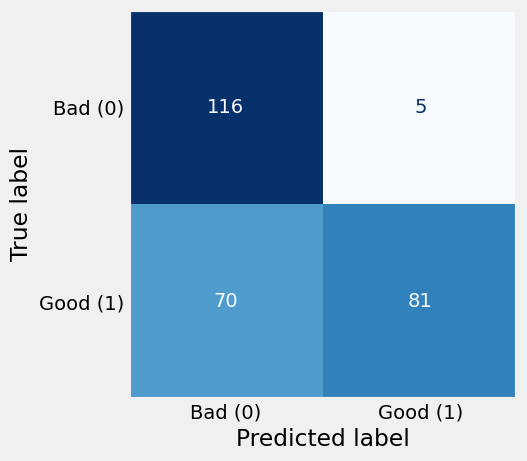

{'model__kernel': 'linear', 'model__gamma': 10, 'model__degree': 5, 'model__C': 0.01}
Pipeline(steps=[('transform', PowerTransformer()),
                ('model',
                 SVC(C=0.01, degree=5, gamma=10, kernel='linear',
                     probability=True, random_state=17))])


In [71]:
svm = SVC(probability=True, random_state=17)
pipe_svm = Pipeline(steps = [('transform',power), ('model',svm)])
hyperparameters = {'model__C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'model__kernel' : ['linear','rbf','poly'],
                   'model__gamma' : [0.0001, 0.001, 0.01, 0.1, 10]}
#Hyperparameter tuning
svm_tuned = RandomizedSearchCV(estimator = pipe_svm,
                               param_distributions = hyperparameters,
                               cv = 5,
                               scoring = 'precision',
                               return_train_score = True)

svm_tuned.fit(X_train, Y_train)
Y_pred_train = svm_tuned.predict_proba(X_train)[:,1]
Y_pred_test = svm_tuned.predict_proba(X_test)[:,1]
Y_pred_train = [1 if i >= 0.75 else 0 for i in Y_pred_train]
Y_pred_test = [1 if i >= 0.75 else 0 for i in Y_pred_test]
result_train_svmtuned, result_test_svmtuned = eval_metrics(Y_train, Y_test, Y_pred_train, Y_pred_test)
print(svm_tuned.best_params_)
print(svm_tuned.best_estimator_)

In [72]:
index_modeltuned = ['precision train', 'precision test', 'recall train','recall test',
                    'accuracy train', 'accuracy test', 'roc auc train','roc auc test']
compare_svm = round(pd.DataFrame({'SVM original' : [result_train_svm[0], result_test_svm[0], result_train_svm[1], result_test_svm[1], result_train_svm[2],
                                                    result_test_svm[2], result_train_svm[3], result_test_svm[3]],
                                  'SVM Tuning'   : [result_train_svmtuned[0], result_test_svmtuned[0], result_train_svmtuned[1], result_test_svmtuned[1], result_train_svmtuned[2],
                                                    result_test_svmtuned[2], result_train_svmtuned[3], result_test_svmtuned[3]]}, index = index_modeltuned)*100, 2)
compare_svm

,SVM original,SVM Tuning
precision train,92.21,88.07
precision test,91.11,94.19
recall train,57.14,48.46
recall test,54.30,53.64
accuracy train,74.19,68.55
accuracy test,71.69,72.43
roc auc train,75.72,70.36
roc auc test,73.85,74.76


&nbsp;&nbsp; When comparing the precision test value of `SVM hyperparameter tuning` to the original SVM, there is a minor gain of approximately **3%**. After changing the parameter, additional metrics like `recall, accuracy, and roc auc score` also indicate higher results. Therefore, the optimal model for production use is `SVM with hyperparameter tuning` with the combined parameter of : <br>
C = 0.01 <br>
gamma = 0.0001 <br>
kernel = rbf <br>


### Feature Importance

In [73]:
explainers = shap.explainers.Permutation(svm_tuned.predict, X_test, feature_names = X_train.columns.tolist())
shap_values = explainers(X_test)

PermutationExplainer explainer: 273it [04:57,  1.11s/it]


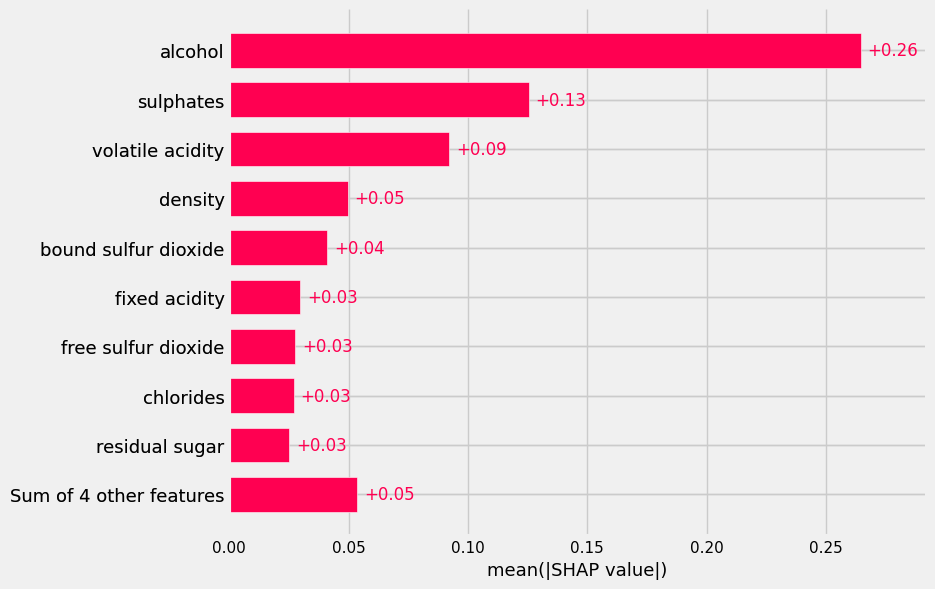

In [74]:
shap.plots.bar(shap_values)

Feature importance in SVM based on SHAP values show similar result with ANOVA for the top 3 (`alcohol, sulphates, volatile acidity`). These physicochemical features have higher impact on sensory quality of wine.

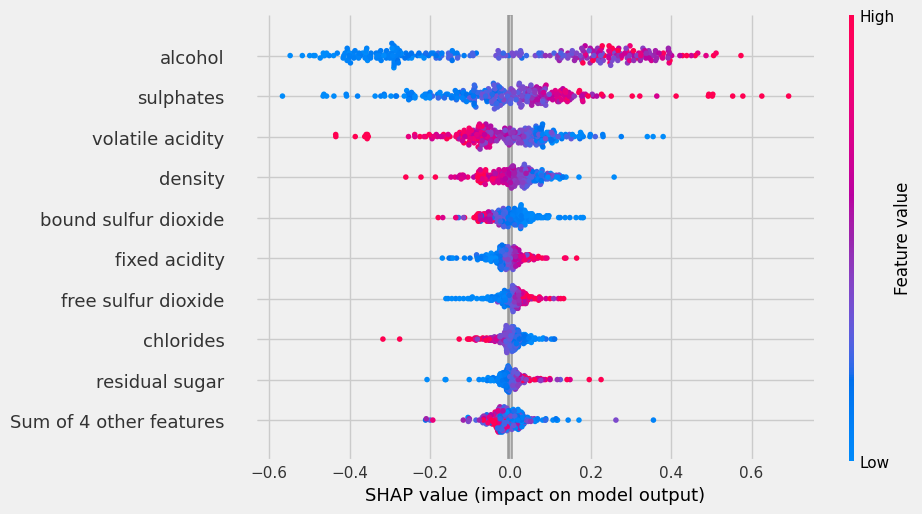

In [75]:
shap.plots.beeswarm(shap_values)

 &nbsp; &nbsp;  A greater quality can be obtained by increasing the concentration of `alcohol, sulfates, fixed acidity, free sulfur dioxide, and residual sugar`, according to the results of the SHAP beeswarm charts. Meanwhile, lowering the content of `volatile acidity, density, bound sulfur dioxide, and chloride` compounds can also create a good quality of wine.

### Save the Pipeline for Production
The pipeline contains transformations, and the model is stored in a file with the extension `pickle`, and then used for the next deployment.

In [76]:
#Declare the best parameter of SVM and store into pipeline along with Yeo-Johnson Transformation
model_final = Pipeline(([('transform', power), ('model', SVC(probability=True, C = 1, gamma = 0.001, kernel= 'rbf', random_state=17))]))
model_final.fit(X_train, Y_train)

#Save into pickle extension file
pickle.dump(model_final, open('/content/drive/MyDrive/Project Data Science/wine_svm_final.pkl', 'wb'))

precision train score: 0.8807017543859649
precision test score: 0.9418604651162791
recall train score: 0.48455598455598453
recall test score: 0.5364238410596026
accuracy train score: 0.6854754440961337
accuracy test score: 0.7242647058823529
roc auc train score: 0.7035536187016824
roc auc test score: 0.7475507635050079


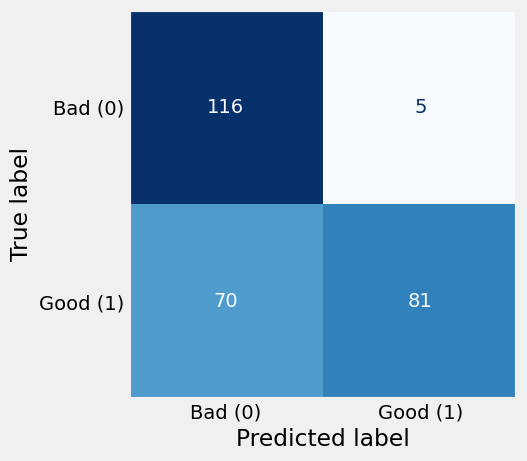

In [77]:
#Load the model for testing
load_model = pickle.load(open('/content/drive/MyDrive/Project Data Science/wine_svm_final.pkl', 'rb'))

Y_pred_train = load_model.predict_proba(X_train)[:,1]
Y_pred_test = load_model.predict_proba(X_test)[:,1]
Y_pred_train = [1 if i >= 0.75 else 0 for i in Y_pred_train]
Y_pred_test = [1 if i >= 0.75 else 0 for i in Y_pred_test]
result_train_final, result_test_final = eval_metrics(Y_train, Y_test, Y_pred_train, Y_pred_test)

## References :
Ailer, Š., Valšíková, M., Jedlička1, J., Mankovecký, J., and Mojmír Baroň, M. Influence of Sugar and Ethanol Content and Color of Wines On the
Sensory Evaluation: from Wine Competition “Nemčiňany Wine Days” in
Slovak Republic (2013–2016). Erwerbs-Obstbau 62(24): 1-11, 2020. <br>

Avram, C., and Mărușteri, M. Normality assessment, few paradigms and use cases. Revista Română de Medicină de Laborator 30(3): 251-259, 2022. <br>

Blesic, M., Mujakic, V., Spaho, N., Smajic-Murtic, M. Threshold of sensory perception of sulfur dioxide in Herzegovinian White Wines. Conference : 25th International Scientific-Experts Congress on Agriculture and Food Industry <br>

Coli, M. S., Rangel, A. G. P., Souza, E. S., Oliveira, M. F., and Chiaradia, A. C. N. Chloride concentration in red wines: influence of terroir and grape type. Food Sci. Technol, Campinas, 35(1): 95-99, 2015. <br>

Dinno, A. Nonparametric pairwise multiple comparisons in
independent groups using Dunn’s test. The Stata Journal 15(1): 292-300, 2015. <br>

Koranga, M., Pandey, R., Joshi, M., Kumar, M. Analysis of white wine using machine learning algorithms. Materials Today: Proceedings 46: 11087-11093, 2021. <br>

Lagunam L., Álvarez, M. A., Simone, E., Moreno-Arribas, M. A., and Bartolomé, B. Oral wine texture perception and its correlation with instrumental texture features of wine-saliva mixtures. Foods 8(190): 1-14, 2019. <br>

Loryn, L. C., Petrie, P. R., Hasted, A. M., Johnson, T. E., Collins, C., and Bastian, S. E. P. Evaluation of sensory thresholds and perception of sodium chlorides in grape juice and wine. American Society for Enology and Viticulture 65(1): 124-133, 2014. <br>

McMahon, K. M., Diako, C., Aplin IV., J., Mattinson, D. S., Culver, C., and Ross, C. F. Trained and consumer panel evaluation of sparkling wines sweetened to brut or demi sec residual sugar levels with three different sugars. Food Research International 99(1): 173-185, 2017. <br>

Monro, T. M., Moore, R. L., Nguyen, M., Ebendorff-Heidepriem, H., Skouroumounis, G. K., Elsey, G. M., Taylor, D. K. Sensing free sulfur dioxide in wine. Sensors 12: 10759-10773.<br>

Nwakuya, M. T., and Anyaogu, I. V. Implementation of Yeo-Johnson Transformation in Quantile Regression. Benin Journal of Statistics 5: 123-136. <br>

Ohana-Levi, N., and Netzer, Y. Long-Term Trends of Global Wine Market. Agriculture 13(224): 1-29, 2023.<br>

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. <br>

Zhang, C., and Rosentrater, K. A. Estimating Economic and Environmental Impacts of Red-Wine-Making Processes in the USA. Fermentation 5(77): 1-14, 2019. <br>

Zoecklein B. W., Fugelsang K. C., Gump, B. H., and Nury, F. S. Wine Analysis and Production. Springer Science+Business Media. New York, 1999. <br>